In [1]:
library(patchwork)
library(igraph)
library(ggplot2)
library(reshape2)


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




In [2]:
source('../tools.R')
source('../FLAG.R')

In [3]:
load('asd_data.RData')
ls()

[1] "brain.graph"                 "brain.heatmap"              
 [3] "brain.significant"           "cal.err"                    
 [5] "cal.rec"                     "data"                       
 [7] "get_se_rho"                  "get.2hub"                   
 [9] "get.adj"                     "get.block"                  
[11] "get.bonferroni"              "get.fdr"                    
[13] "get.hubEdge"                 "get.net"                    
[15] "get.roc.labels"              "get.tri"                    
[17] "InferWald"                   "OurMethod"                  
[19] "OurMethod_oneEdge"           "OurMethodOnePair"           
[21] "OurMethodOnePairEta0"        "OurMethodOnePairRankTwo"    
[23] "OurMethodOnePairRankTwoEta0" "plot.sp100.edge.sign"       
[25] "prec2pc"                     "qqplot1"                    
[27] "qqplot2"                     "qqplot3"                    
[29] "remove.diag"                 "run.ant"                    
[31] "run.bggm"                    "run.clime"                  
[33] "run.dsglasso"                "run.glasso"                 
[35] "run.hglasso"                 "run.jgl"                    
[37] "run.mle"                     "sp100.significant"

In [4]:
data

,GRIN2B,DYRK1A,ANK2,TBR1,POGZ,CUL3,SCN2A,region,hemisphere,stage,period
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>,<dbl>,<dbl>
HSB92_A1C_R,1.2062686,0.15031394,0.6859686,2.08758935,0.64539863,-0.0555792258,-0.48320398,1,R,6,6.7
HSB92_AMY_R,2.1550139,-0.98443137,2.5276894,1.72069863,0.77082077,-0.0009039839,0.39016860,3,R,6,6.7
HSB92_CBC_R,-1.6451614,0.51988935,0.8545986,-5.34273923,-0.38100398,0.0777686048,-0.02433606,4,R,6,6.7
HSB92_DFC_R,2.0671894,0.04429863,2.2597208,1.34269602,0.24636860,0.5948139355,-0.54893137,2,R,6,6.7
HSB92_HIP_R,1.9928986,0.14772077,1.5668960,0.45826860,0.56991394,-1.0059313710,1.06188935,3,R,6,6.7
HSB92_IPC_R,1.9903208,-0.10910398,1.8691686,1.86921394,-0.93143137,0.4314893548,0.77839863,1,R,6,6.7
HSB92_ITC_R,1.2551960,0.12686860,2.1267139,-0.01153137,0.76358935,0.6075986290,0.22072077,1,R,6,6.7
HSB92_M1C_R,1.5420686,0.32391394,0.8139686,2.19858935,0.51519863,0.5815207742,0.53269602,2,R,6,6.7
HSB92_MD_R,-0.6912361,-1.65576137,1.8043894,-1.61239137,-0.36527923,-0.0479039839,0.12146860,4,R,6,6.7


In [5]:
period.list = c(3.5, 6.7, 8.9, 10.12, 13, 14, 15)
genes.asd = c('GRIN2B', 'DYRK1A', 'ANK2', 'TBR1', 'POGZ', 'CUL3', 'SCN2A')
genes.asd.num = length(genes.asd)
P = genes.asd.num

In [6]:
# df.prec = data.frame(X=rep(genes.asd, genes.asd.num), Y=rep(genes.asd, each=genes.asd.num))
# df.prec$X = factor(df.prec$X, levels = genes.asd)
# df.prec$Y = factor(df.prec$Y, levels = genes.asd)

In [7]:
# prec2corr<-function(prec) {
#   corr = -cov2cor(prec)
#   diag(corr) = 1
#   corr
# }
# om.significant<-function(OM.prd) {
#   s = round(-cov2cor(OM.prd$precision.est),2)
#   for(i in 1:P){
#     for(j in 1:P){
#       if(OM.prd$precision.pval[i,j]<0.05) s[i,j] = paste(s[i,j],'*',sep='')
#       if(OM.prd$edge.bonferroni[i,j]==1) s[i,j] = paste(s[i,j],'*',sep='')
#     }
#   }
# #   s[OM.prd$precision.pval<0.05] = '*'
# #   s[OM.prd$edge.bonferroni==1] = '**'
#   diag(s)=''
#   s
# }
# get.net<-function(OM.prd){
#   edge = ifelse(OM.prd$precision.pval<0.05, 1, 0)
#   edge[OM.prd$edge.bonferroni==1] = 0.9
#   diag(edge)=0
#     net <- graph_from_adjacency_matrix(edge, mode = "undirected",weighted = TRUE)
#   E(net)$color[E(net)$weight == 1] <- 'blue'
#   E(net)$lty[E(net)$weight == 1] <- 2
#   E(net)$color[E(net)$weight == 0.9] <- 'red'
#   E(net)$lty[E(net)$weight == 0.9] <- 1
#   net
# }
# fastggm.net<-function(fastggm.prd){
#   edge = ifelse(fastggm.prd$p_precision<0.05, 1, 0)
#   edge[fastggm.prd$p_precision<0.05/(P*(P-1)/2)] = 0.9
#   diag(edge)=0
#     net <- graph_from_adjacency_matrix(edge, mode = "undirected",weighted = TRUE)
#   E(net)$color[E(net)$weight == 1] <- 'blue'
#   E(net)$lty[E(net)$weight == 1] <- 2
#   E(net)$color[E(net)$weight == 0.9] <- 'red'
#   E(net)$lty[E(net)$weight == 0.9] <- 1
#   net
# }
# # get.plot = function(df, reg, prd){
# #   ggplot(data = df, aes(Y, X, fill = Z))+ geom_tile(aes(fill = Z)) + coord_fixed() + 
# #     scale_fill_gradient2(low = "#008837", high = "#7b3294", mid = "white", midpoint = 0, limits=c(-1,1), name='corr') +
# #     theme(axis.text.x = element_text(angle = 45, vjust = 1, size = 12, hjust = 1), axis.title.x = element_blank(), axis.title.y = element_blank(), panel.grid.major = element_blank(), panel.border = element_blank(), panel.background = element_blank(),axis.ticks = element_blank(),
# #       legend.justification = c(1, 0), legend.position = c(0.97, 0.99), legend.direction = "horizontal") +
# #     geom_text(aes(Y, X, label = S), color = "black", size = 4)+ggtitle(paste(c('partial corr: r',reg, ' p', prd), collapse = ""))
# # }

In [6]:
data.r1 = data[which(data$region=='1'),]
exp.r1 = data.r1[1:genes.asd.num]
data.r2 = data[which(data$region=='2'),]
exp.r2 = data.r2[1:genes.asd.num]
data.r3 = data[which(data$region=='3'),]
exp.r3 = data.r3[1:genes.asd.num]
data.r4 = data[which(data$region=='4'),]
exp.r4 = data.r4[1:genes.asd.num]

# Region 1

In [426]:
# data.r1 = data[which(data$region=='1'),]
# exp.r1 = data.r1[1:genes.asd.num]
# options(repr.plot.width=5, repr.plot.height=5)
# for(prd in period.list){
#   exp.r1.prd = exp.r1[which(data.r1[,'period']==prd),]
#   cat(prd, dim(exp.r1.prd)[1], '\n')
#   OM.r1.prd = OurMethod(exp.r1.prd)
#   fastggm.r1.prd = FastGGM(as.matrix(exp.r1.prd))
  
# #   # estimated graph： our method
# #   jpeg(file = paste(c('OurMethod_graph/', 'r1p', prd,'.jpeg'), collapse = ""))
# #   set.seed(0)
# #   net=get.net(OM.r1.prd)
# #   plot(net, vertex.label = colnames(exp.r1.prd), layout = layout_in_circle,
# #      vertex.size = 1, vertex.color='red', vertex.label.family = "Helvetica", vertex.label.color = "black",
# #      vertex.label.dist = 1, vertex.label.cex= 1, vertex.shape = "circle",
# #      edge.width = 2*E(net)$weight, main=paste(c('r1, p', prd, ', SS', dim(exp.r1.prd)[1], ', OM(bc:r, p:b)'), collapse = ""))
# #   dev.off()

# #   # estimated graph： fastggm
# #   jpeg(file = paste(c('ant_graph/', 'r1p', prd,'.jpeg'), collapse = ""))
# #   set.seed(0)
# #   net=fastggm.net(fastggm.r1.prd)
# #   plot(net, vertex.label = colnames(exp.r1.prd), layout = layout_in_circle,
# #      vertex.size = 1, vertex.color='red', vertex.label.family = "Helvetica", vertex.label.color = "black",
# #      vertex.label.dist = 1, vertex.label.cex= 1, vertex.shape = "circle",
# #      edge.width = 2*E(net)$weight, main=paste(c('r1, p', prd, ', SS', dim(exp.r1.prd)[1], ', ANT(bc:r, p:b)'), collapse = ""))
# #   dev.off()
  
#   # precision
#   partial.corr = -cov2cor(OM.r1.prd$precision.est)
#   diag(partial.corr) = 1
#   df.prec$Z = c(partial.corr)
#   df.prec$S = c(get.significant(OM.r1.prd))
# #   df.prec[paste('Z', prd, sep='')] = c(partial.corr)
# #   df.prec[paste('S', prd, sep='')] = c(get.significant(OM.r1.prd))
#   jpeg(file = paste(c('OurMethod_precision/', 'r1p', prd,'.jpeg'), collapse = ""))
#   print(ggplot(data = df.prec, aes(Y, X, fill = Z))+ geom_tile(aes(fill = Z)) + coord_fixed() + 
#     scale_fill_gradient2(low = "#008837", high = "#7b3294", mid = "white", midpoint = 0, limits=c(-1,1), name='corr') +
#     theme(axis.text.x = element_text(angle = 45, vjust = 1, size = 12, hjust = 1), axis.title.x = element_blank(), axis.title.y = element_blank(), panel.grid.major = element_blank(), panel.border = element_blank(), panel.background = element_blank(),axis.ticks = element_blank(),
#       legend.justification = c(1, 0), legend.position = c(0.97, 0.99), legend.direction = "horizontal") +
#     geom_text(aes(Y, X, label = S), color = "black", size = 4)+ggtitle(paste(c('partial corr: r1', ' p', prd), collapse = "")))
#   dev.off()
# }

3.5 87 
6.7 82 
8.9 44 
10.12 69 
13 69 
14 30 
15 30 


In [414]:
# options(repr.plot.width=21, repr.plot.height=10)
# p3.5=get.plot(data.frame(X=df.prec$X, Y=df.prec$Y, Z=df.prec$Z3.5, S=df.prec$S3.5), 1, 3.5)
# p6.7=get.plot(data.frame(X=df.prec$X, Y=df.prec$Y, Z=df.prec$Z6.7, S=df.prec$S6.7), 1, 6.7)
# p8.9=get.plot(data.frame(X=df.prec$X, Y=df.prec$Y, Z=df.prec$Z8.9, S=df.prec$S8.9), 1, 8.9)
# p10.12=get.plot(data.frame(X=df.prec$X, Y=df.prec$Y, Z=df.prec$Z10.12, S=df.prec$S10.12), 1, 10.12)
# p13=get.plot(data.frame(X=df.prec$X, Y=df.prec$Y, Z=df.prec$Z13, S=df.prec$S13), 1, 13)
# p14=get.plot(data.frame(X=df.prec$X, Y=df.prec$Y, Z=df.prec$Z14, S=df.prec$S14), 1, 14)
# p15=get.plot(data.frame(X=df.prec$X, Y=df.prec$Y, Z=df.prec$Z15, S=df.prec$S15), 1, 15)
# p3.5+p6.7+p8.9+p10.12+p13+p14+p15+ plot_layout(ncol = 4)

# Region 2

In [7]:
data.r2 = data[which(data$region=='2'),]
exp.r2 = data.r2[1:genes.asd.num]
options(repr.plot.width=5, repr.plot.height=5)
prd = 13
# for(prd in period.list){
  exp.r2.prd = exp.r2[which(data.r2[,'period']==prd),]
  cat(prd, dim(exp.r2.prd)[1], '\n')
  OM.r2.prd = OurMethod(exp.r2.prd)
#   fastggm.r2.prd = FastGGM(as.matrix(exp.r2.prd))
  
#   # estimated graph： our method
#   jpeg(file = paste(c('OurMethod_graph/', 'r2p', prd,'.jpeg'), collapse = ""))
  set.seed(0)
  net=get.net(OM.r2.prd)
  plot(net, vertex.label = colnames(exp.r2.prd), layout = layout_in_circle,
     vertex.size = 1, vertex.color='red', vertex.label.family = "Helvetica", vertex.label.color = "black",
     vertex.label.dist = 1, vertex.label.cex= 1, vertex.shape = "circle",
     edge.width = 2*E(net)$weight, main=paste(c('r2, p', prd, ', SS', dim(exp.r2.prd)[1], ', OM(bc:r, p:b)'), collapse = ""))
#   dev.off()
  
#   # estimated graph： fastggm
#   jpeg(file = paste(c('ant_graph/', 'r2p', prd,'.jpeg'), collapse = ""))
#   set.seed(0)
#   net=fastggm.net(fastggm.r2.prd)
#   plot(net, vertex.label = colnames(exp.r2.prd), layout = layout_in_circle,
#      vertex.size = 1, vertex.color='red', vertex.label.family = "Helvetica", vertex.label.color = "black",
#      vertex.label.dist = 1, vertex.label.cex= 1, vertex.shape = "circle",
#      edge.width = 2*E(net)$weight, main=paste(c('r2, p', prd, ', SS', dim(exp.r2.prd)[1], ', ANT(bc:r, p:b)'), collapse = ""))
#   dev.off()
  
#   # precision
#   partial.corr = -cov2cor(OM.r2.prd$precision.est)
#   diag(partial.corr) = 1
#   df.prec$Z = c(partial.corr)
#   df.prec$S = c(get.significant(OM.r2.prd))
# #   df.prec[paste('Z', prd, sep='')] = c(partial.corr)
# #   df.prec[paste('S', prd, sep='')] = c(get.significant(OM.r2.prd))
#   jpeg(file = paste(c('OurMethod_precision/', 'r2p', prd,'.jpeg'), collapse = ""))
#   print(ggplot(data = df.prec, aes(Y, X, fill = Z))+ geom_tile(aes(fill = Z)) + coord_fixed() + 
#     scale_fill_gradient2(low = "#008837", high = "#7b3294", mid = "white", midpoint = 0, limits=c(-1,1), name='corr') +
#     theme(axis.text.x = element_text(angle = 45, vjust = 1, size = 12, hjust = 1), axis.title.x = element_blank(), axis.title.y = element_blank(), panel.grid.major = element_blank(), panel.border = element_blank(), panel.background = element_blank(),axis.ticks = element_blank(),
#       legend.justification = c(1, 0), legend.position = c(0.97, 0.99), legend.direction = "horizontal") +
#     geom_text(aes(Y, X, label = S), color = "black", size = 4)+ggtitle(paste(c('partial corr: r2', ' p', prd), collapse = "")))
#   dev.off()

# }

13 85 


ERROR: Error in matrix(0, P, P): non-numeric matrix extent


#### sample covariance and om in all periods

In [879]:
options(repr.plot.width=5, repr.plot.height=5)
for(prd in period.list){
  exp.r2.prd = exp.r2[which(data.r2[,'period']==prd),]
  cat(prd, dim(exp.r2.prd)[1], '\n')
  partial.corr = prec2corr( solve( cov(exp.r2.prd) ) )
  OM.r2.prd = OurMethod(exp.r2.prd)
  om.corr = prec2corr(OM.r2.prd$precision.est)
  partial.corr[upper.tri(partial.corr)] = om.corr[upper.tri(om.corr)]
  df.prec$Z = c(partial.corr)

  partial.corr.sign = round(partial.corr,2)
  om.sign = get.significant(OM.r2.prd)
  partial.corr.sign[upper.tri(partial.corr.sign)] = om.sign[upper.tri(om.sign)]
  df.prec$S = c(partial.corr.sign)

  jpeg(file = paste(c('samp_om/', 'r2p', prd,'.jpeg'), collapse = ""))
  print(ggplot(data = df.prec, aes(Y, X, fill = Z))+ geom_tile(aes(fill = Z)) + coord_fixed() + 
    scale_fill_gradient2(low = "#008837", high = "#7b3294", mid = "white", midpoint = 0, limits=c(-1,1), name='corr') +
    theme(axis.text.x = element_text(angle = 45, vjust = 1, size = 12, hjust = 1), axis.title.x = element_blank(), axis.title.y = element_blank(), panel.grid.major = element_blank(), panel.border = element_blank(), panel.background = element_blank(),axis.ticks = element_blank(),
      legend.justification = c(1, 0), legend.position = c(0.97, 0.99), legend.direction = "horizontal") +
    geom_text(aes(Y, X, label = S), color = "black", size = 4)+ggtitle(paste(c('partial corr: r2', ' p', prd), collapse = "")))
  dev.off()
}

3.5 98 
6.7 89 
8.9 53 
10.12 74 
13 85 
14 34 
15 34 


### period 13 for methods comparison

In [10]:
set.seed(0)
pair.num = P*(P-1)/2
options(repr.plot.width=5, repr.plot.height=5)
# for(prd in period.list){
prd = 13  

  exp.r2.prd = exp.r2[which(data.r2[,'period']==prd),]
  cat(prd, dim(exp.r2.prd)[1], '\n')

  sample.corr = prec2corr( solve( cov(exp.r2.prd) ) )

  glasso.CV= CVglasso(X=exp.r2.prd, lam = 10^seq(-2, 2, 0.2), K=5, trace='none')
  glasso.CV$Tuning[2]
  GLASSO=glasso(cov(exp.r2.prd), rho=glasso.CV$Tuning[2])
  glasso.corr = prec2corr(GLASSO$wi)

  clime1=fastclime(as.matrix(exp.r2.prd))
  clime2=fastclime.selector(clime1$lambdamtx, clime1$icovlist,0.1)
  clime.corr = prec2corr(clime2$icov)

  OM.r2.prd = OurMethod(exp.r2.prd)
  om.corr = prec2corr(OM.r2.prd$precision.est)

  fastggm.r2.prd = FastGGM(as.matrix(exp.r2.prd))
  fastggm.corr = prec2corr(fastggm.r2.prd$precision)

#   df.corr = data.frame(x=rep(1:pair.num, 4),
#                        y=c(sample.corr[upper.tri(sample.corr)], glasso.corr[upper.tri(glasso.corr)],
#                            #clime.corr[upper.tri(clime.corr)],
#                            om.corr[upper.tri(om.corr)], fastggm.corr[upper.tri(fastggm.corr)]),
#                        z=c(rep('InvCov',pair.num), rep('GLasso',pair.num), #rep('CLIME',pair.num),
#                            rep('Ours',pair.num), rep('Fast', pair.num)))
#   jpeg(file = paste(c('methods_corr/', 'r2p', prd,'.jpeg'), collapse = ""))
#   print(ggplot(data=df.corr,aes(x=x, y=y, color=z)) + geom_point() + scale_y_continuous(limits=c(-0.7,0.7)) +
#         ggtitle(paste(c('partial corr: r2', ' p', prd,', SS', dim(exp.r2.prd)[1]), collapse = "")))
#   dev.off()
# }

13 85 


[1] 0.01584893

Allocating memory 
start recovering 
preparing precision and path matrix list 
Done! 


# case study of edge: comparison between om and FastGGM

In [17]:
# i=2
# j=4
# fastggm.2.13$precision[i,j]
# fastggm.pc[i,j]
# om.2.13$precision.est[i,j]
# om.pc[i,j]

[1] 0.4055445

[1] -0.1449145

[1] 1.008571

[1] -0.2880403

In [199]:
i=2
j=4
fastggm.2.13$precision[i,j]
fastggm.pc[i,j]
om.2.13$precision.est[i,j]
om.pc = prec2pc(om.2.13$precision.est)
om.pc[i,j]

[1] 0.4055445

[1] -0.1449145

[1] 1.008571

[1] -0.2880403

# method comparsion in region 2 period 13

In [7]:
set.seed(0)
pair.num = P*(P-1)/2
prd = 13

data.r2 = data[which(data$region=='2'),]
exp.r2 = data.r2[1:genes.asd.num]
data.comp = as.matrix( exp.r2[which(data.r2[,'period']==prd),] )

  mle.prec = run.mle(data.comp)
  mle.pc = prec2pc(mle.prec)
  clime.prec = run.clime(data.comp, lambda=0.1)$icov
  clime.pc = prec2pc(clime.prec)

  om.2.13 = OurMethod(data.comp)
  om.prec = om.2.13$precision.est
  om.pc = prec2pc( om.prec )
  fastggm.2.13 = FastGGM::FastGGM(data.comp)
  fastggm.prec = fastggm.2.13$precision
  fastggm.pc = prec2pc(fastggm.prec)

  glasso.prec = run.glasso(data.comp)$wi
  glasso.pc = prec2pc(glasso.prec)
  bggm = run.bggm(data.comp)
  bggm.prec = bggm$precision
  bggm.pc = prec2pc(bggm$precision)
  bggm.edge = get.adj(bggm$edge)
#   dsglasso.pc = prec2pc( run.dsglasso(data.comp)$precision )

Allocating memory 
start recovering 
preparing precision and path matrix list 
Done! 


Registered S3 methods overwritten by 'BFpack':
  method               from
  get_estimates.lm     bain
  get_estimates.t_test bain

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



  |======================================================================| 100%

In [46]:
brain.heatmap <- function(dims, mat, title, method=NULL, pval=NULL, edge=NULL, tri=FALSE){
#   print(range(get.tri(mat)))
  P = length(dims)
  df = data.frame(X=rep(dims, P), Y=rep(dims, each=P))
  df$X = factor(df$X, levels = dims)
  df$Y = factor(df$Y, levels = dims)
  diag(mat)=0
  S = round(mat,2)
  
  if(tri){
    mat[lower.tri(mat)]=0
  }
  df$Z = c(mat)
  
  if(!is.null(method)) S=brain.significant(S, method, pval, edge)
  diag(S)=''
  if(tri){
    S[upper.tri(S)]=''
  }
  df$S = c(S)
  ggplot(df, aes(X, Y, fill= Z)) + geom_tile(aes(fill = Z)) + ggtitle(title) + coord_fixed() +
    scale_fill_gradient2(low = "#008837", high = "#7b3294", mid = "white", midpoint = 0, limits=c(-0.6, 0.3), name='partial correlation') +
    theme(axis.text.x = element_text(angle = 45, vjust = 1, size = 10, hjust = 1), axis.title.x = element_blank(), axis.title.y = element_blank(), panel.grid.major = element_blank(), panel.border = element_blank(), panel.background = element_blank(),axis.ticks = element_blank(),
#       legend.justification = c(1, 0), legend.position = c(0.97, 0.99), legend.direction = "horizontal") +
    ) +
    geom_text(aes(Y, X, label = S), color = "black", size = 4)
}

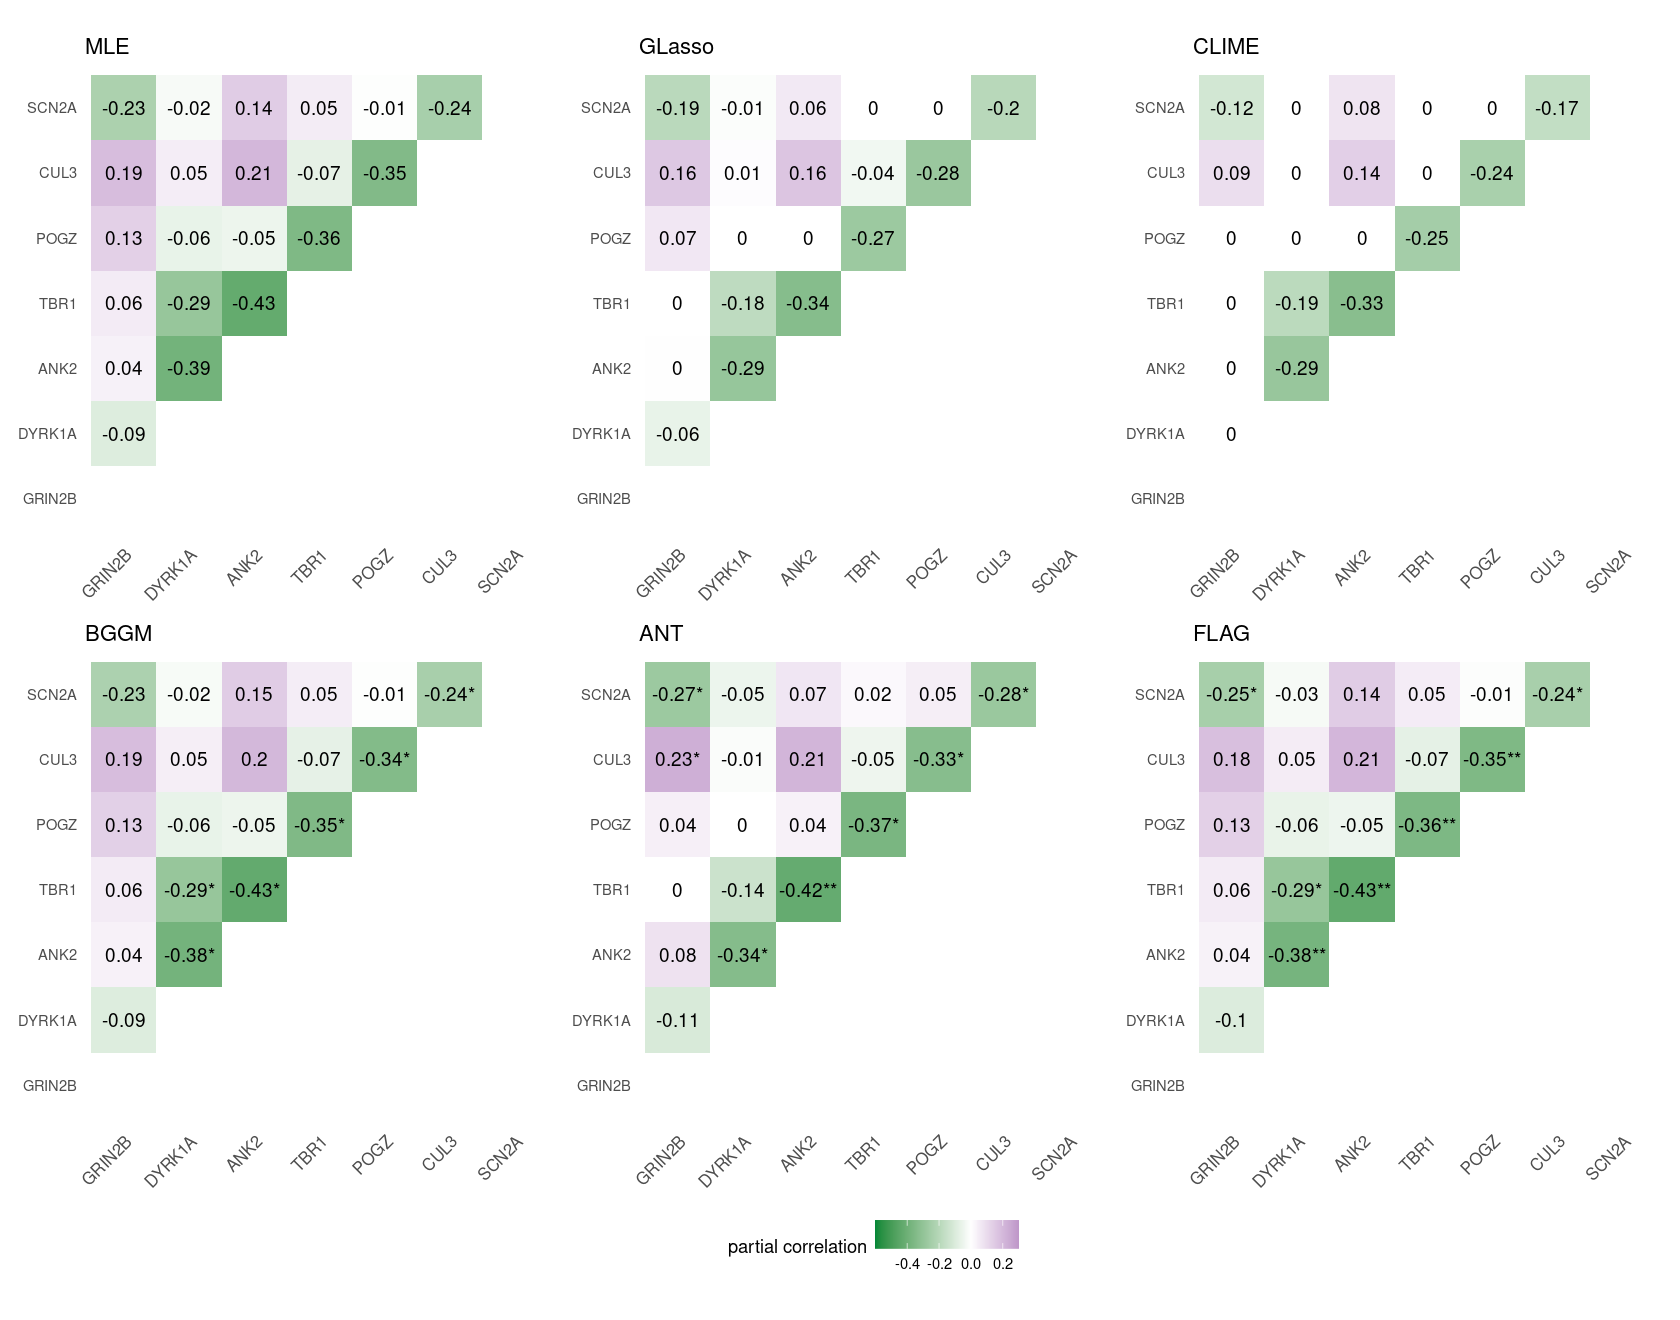

In [68]:
options(repr.plot.width=14, repr.plot.height=11)
brain.heatmap(genes.asd, mle.pc, 'MLE', tri=TRUE) +
brain.heatmap(genes.asd, glasso.pc, 'GLasso', tri=TRUE) +
brain.heatmap(genes.asd, clime.pc, 'CLIME', tri=TRUE) +
brain.heatmap(genes.asd, bggm.pc, 'BGGM', method='bggm', edge=bggm.edge, tri=TRUE) +
brain.heatmap(genes.asd, fastggm.pc, 'ANT', method='fastggm', pval=fastggm.2.13$p_precision, tri=TRUE) +
brain.heatmap(genes.asd, om.pc, 'FLAG', method='om', pval=om.2.13$precision.pval, tri=TRUE) +

# brain.heatmap(genes.asd, dsglasso.pc, 'DsGLasso'tri=TRUE) +
plot_layout(ncol = 3) + plot_layout(guides = "collect") & theme(legend.position = 'bottom')

In [59]:
brain.graph <- function(dims, mat, title, method=NULL, pval=NULL, path=NULL, filename=NULL){
  set.seed(0)
  mat = abs(mat)
  diag(mat)=0
  if(is.null(method)) net = graph_from_adjacency_matrix(mat, mode = "undirected",weighted = TRUE)
  else if(method=='om' | method=='fastggm'){
    net = get.net(pval, mat)
  }
  else if(method=='om.meta') E(net)$color='red'
  options(repr.plot.width=4, repr.plot.height=4)
  if(is.null(path)){
    plot(net, vertex.label = dims, layout = layout_in_circle,
       vertex.size = 1, vertex.color='red', vertex.label.family = "Helvetica", vertex.label.color = "black",
       vertex.label.dist = 2, vertex.label.cex= 1.3, vertex.shape = "circle", edge.width = 6*E(net)$weight, main=title)
  }
  if(!is.null(path)){
    if(is.null(filename)) jpeg(file = paste(c(path, title,'.jpeg'), collapse = ""))
    else jpeg(file = paste(c(path, filename,'.jpeg'), collapse = ""))
    plot(net, vertex.label = dims, layout = layout_in_circle,
       vertex.size = 1, vertex.color='red', vertex.label.family = "Helvetica", vertex.label.color = "black",
       vertex.label.dist = 2, vertex.label.cex= 1.3, vertex.shape = "circle", edge.width = 6*E(net)$weight, main=title)
    dev.off()
  }
}

In [61]:
# brain.graph(genes.asd, mle.prec, 'mle')
# brain.graph(genes.asd, mle.pc, 'mle')

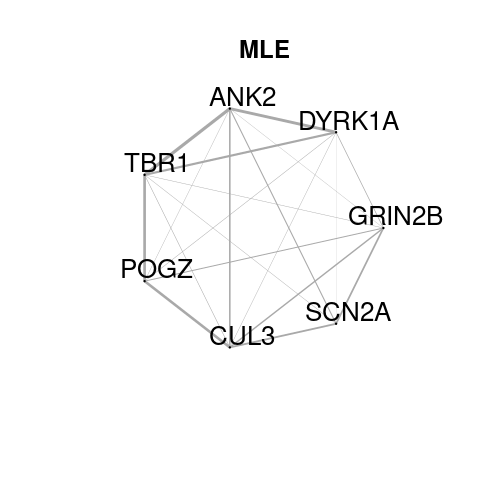

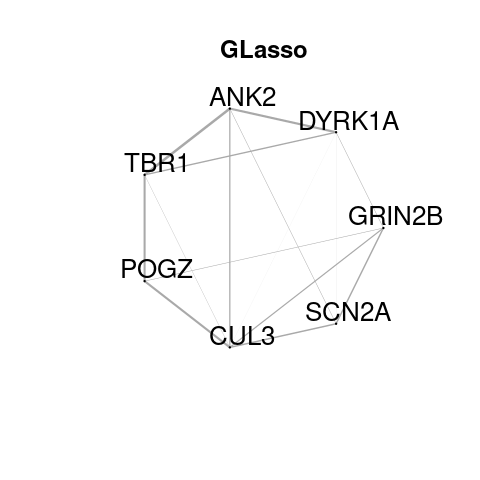

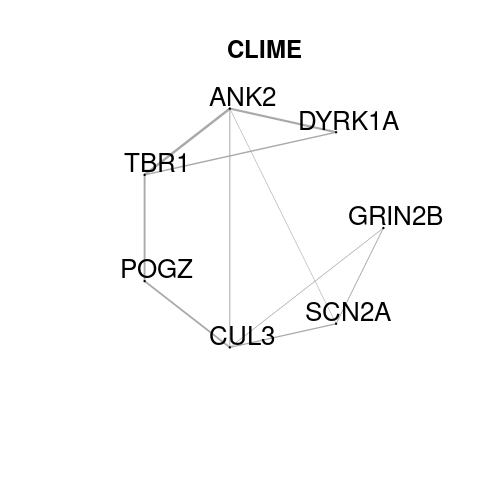

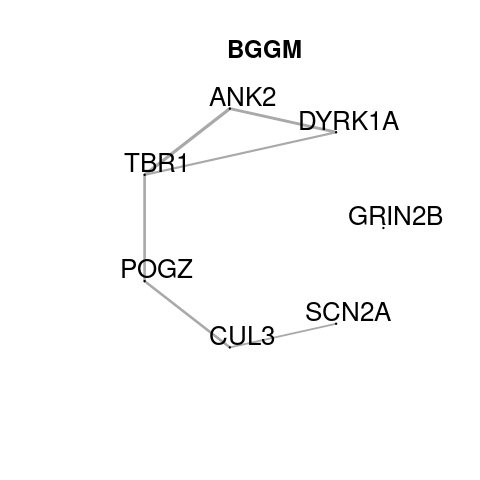

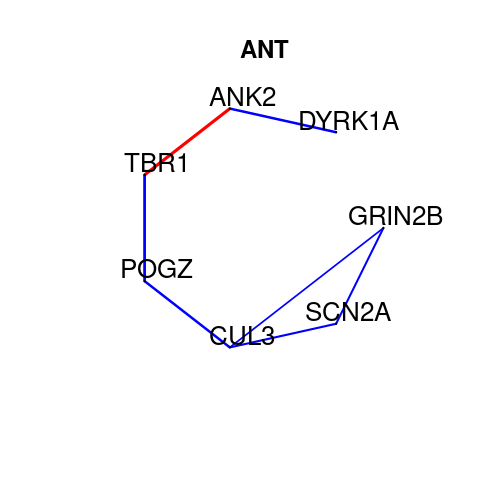

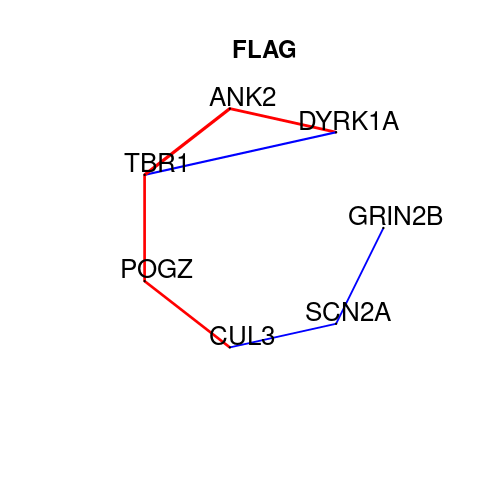

In [62]:
brain.graph(genes.asd, mle.pc, 'MLE')
brain.graph(genes.asd, glasso.pc, 'GLasso')
brain.graph(genes.asd, clime.pc, 'CLIME')
brain.graph(genes.asd, bggm.pc*bggm.edge, 'BGGM')
brain.graph(genes.asd, fastggm.pc, 'ANT', 'fastggm', fastggm.2.13$p_precision)
brain.graph(genes.asd, om.pc, 'FLAG', 'om', om.2.13$precision.pval)

In [63]:
brain.graph(genes.asd, mle.pc, 'MLE', path='graph_methods/')
brain.graph(genes.asd, glasso.pc, 'GLasso', path='graph_methods/')
brain.graph(genes.asd, clime.pc, 'CLIME', path='graph_methods/')
brain.graph(genes.asd, bggm.pc*bggm.edge, 'BGGM', path='graph_methods/')
brain.graph(genes.asd, fastggm.pc, 'ANT', 'fastggm', fastggm.2.13$p_precision, path='graph_methods/')
brain.graph(genes.asd, om.pc, 'FLAG', 'om', om.2.13$precision.pval, path='graph_methods/')

png 
  2

png 
  2

png 
  2

png 
  2

png 
  2

png 
  2

# Plot graphs from our method in all (period, region)

In [119]:
data.r1 = data[which(data$region=='1'),]
exp.r1 = data.r1[1:genes.asd.num]
for(prd in period.list){
  exp.r1.prd = exp.r1[which(data.r1[,'period']==prd),]
  cat(prd, dim(exp.r1.prd)[1], '\n')
  OM.r1.prd = OurMethod(exp.r1.prd)
  om.pc = prec2pc( OM.r1.prd$precision.est )
#   brain.graph(genes.asd, om.pc, paste(c('p', prd, ', SS', dim(exp.r1.prd)[1], '; bc:r, fdr:b'), collapse = ""),
#               'om', OM.r1.prd$precision.pval)
  brain.graph(genes.asd, om.pc, paste(c('p', prd, ', SS', dim(exp.r1.prd)[1], '; bc:r, fdr:b'), collapse = ""),
              'om', OM.r1.prd$precision.pval, path='graph_om/', filename=paste(c('r1p', prd), collapse = ""))
}

3.5 87 
6.7 82 
8.9 44 
10.12 69 
13 69 
14 30 
15 30 


In [125]:
source('/home/yqianai/graphical_model/precision_matrix_estimation/tools.R')

In [128]:
data.r2 = data[which(data$region=='2'),]
exp.r2 = data.r2[1:genes.asd.num]
for(prd in period.list){
  exp.r2.prd = exp.r2[which(data.r2[,'period']==prd),]
  cat(prd, dim(exp.r2.prd)[1], '\n')
  OM.r2.prd = OurMethod(exp.r2.prd)
  om.pc = prec2pc( OM.r2.prd$precision.est )
  brain.graph(genes.asd, om.pc, paste(c('p', prd, ', SS', dim(exp.r2.prd)[1], '; bc:r, fdr:b'), collapse = ""),
              'om', OM.r2.prd$precision.pval, path='graph_om/', filename=paste(c('r2p', prd), collapse = ""))
}

3.5 98 
6.7 89 
8.9 53 
10.12 74 
13 85 
14 34 
15 34 


In [130]:
data.r3 = data[which(data$region=='3'),]
exp.r3 = data.r3[1:genes.asd.num]
for(prd in period.list){
  exp.r3.prd = exp.r3[which(data.r3[,'period']==prd),]
  cat(prd, dim(exp.r3.prd)[1], '\n')
  OM.r3.prd = OurMethod(exp.r3.prd)
  om.pc = prec2pc( OM.r3.prd$precision.est )
  brain.graph(genes.asd, om.pc, paste(c('p', prd, ', SS', dim(exp.r3.prd)[1], '; bc:r, fdr:b'), collapse = ""),
              'om', OM.r3.prd$precision.pval, path='graph_om/', filename=paste(c('r3p', prd), collapse = ""))
}

3.5 52 
6.7 45 
8.9 24 
10.12 27 
13 39 
14 16 
15 18 


In [131]:
data.r4 = data[which(data$region=='4'),]
exp.r4 = data.r4[1:genes.asd.num]
for(prd in period.list){
  exp.r4.prd = exp.r4[which(data.r4[,'period']==prd),]
  cat(prd, dim(exp.r4.prd)[1], '\n')
  OM.r4.prd = OurMethod(exp.r4.prd)
  om.pc = prec2pc( OM.r4.prd$precision.est )
  brain.graph(genes.asd, om.pc, paste(c('p', prd, ', SS', dim(exp.r4.prd)[1], '; bc:r, fdr:b'), collapse = ""),
              'om', OM.r4.prd$precision.pval, path='graph_om/', filename=paste(c('r4p', prd), collapse = ""))
}

3.5 23 
6.7 31 
8.9 18 
10.12 20 
13 27 
14 11 
15 11 


In [911]:
# set.seed(0)
# lambda1=0.1
# lambda3=0.1
# lambdas2=seq(0.05,0.5,by=0.05)
# BICcriterion=NULL
# for(lambda2 in lambdas2){
#     res1=hglasso(cov(exp.r2.prd), lambda1, lambda2, lambda3)
#     BICcriterion=c(BICcriterion,hglassoBIC(res1, cov(exp.r2.prd))$BIC)
# }
# lambda2=lambdas2[which(BICcriterion==min(BICcriterion))]
# lambda2[1]
# HGLASSO=hglasso(cov(exp.r2.prd), lambda1, lambda2[1], lambda3)
# HGLASSO$hubind
# HGLASSO$Theta


[1] 0.1

[1] 1 3 4 5 6 7

In [933]:
plot.partial<-function(df.partial, method){
  ggplot(data = df.partial, aes(Y, X, fill = Z))+ geom_tile(aes(fill = Z)) + coord_fixed() + 
    scale_fill_gradient2(low = "#008837", high = "#7b3294", mid = "white", midpoint = 0, limits=c(-1,1), name='corr') +
    theme(axis.text.x = element_text(angle = 45, vjust = 1, size = 12, hjust = 1), axis.title.x = element_blank(), axis.title.y = element_blank(), panel.grid.major = element_blank(), panel.border = element_blank(), panel.background = element_blank(),axis.ticks = element_blank(),
      legend.justification = c(1, 0), legend.position = c(0.97, 0.99), legend.direction = "horizontal") +
    geom_text(aes(Y, X, label = S), color = "black", size = 4)+ggtitle(paste(c('partialcor: ', method), collapse = ""))
}
ant.significant<-function(ant.prd) {
  s = round(-cov2cor(ant.prd$precision),2)
  for(i in 1:P){
    for(j in 1:P){
      if(ant.prd$p_precision[i,j]<0.05) s[i,j] = paste(s[i,j],'*',sep='')
      if(ant.prd$p_precision[i,j]<0.05/(P*(P-1)/2)) s[i,j] = paste(s[i,j],'*',sep='')
    }
  }
  diag(s)=''
  s
}

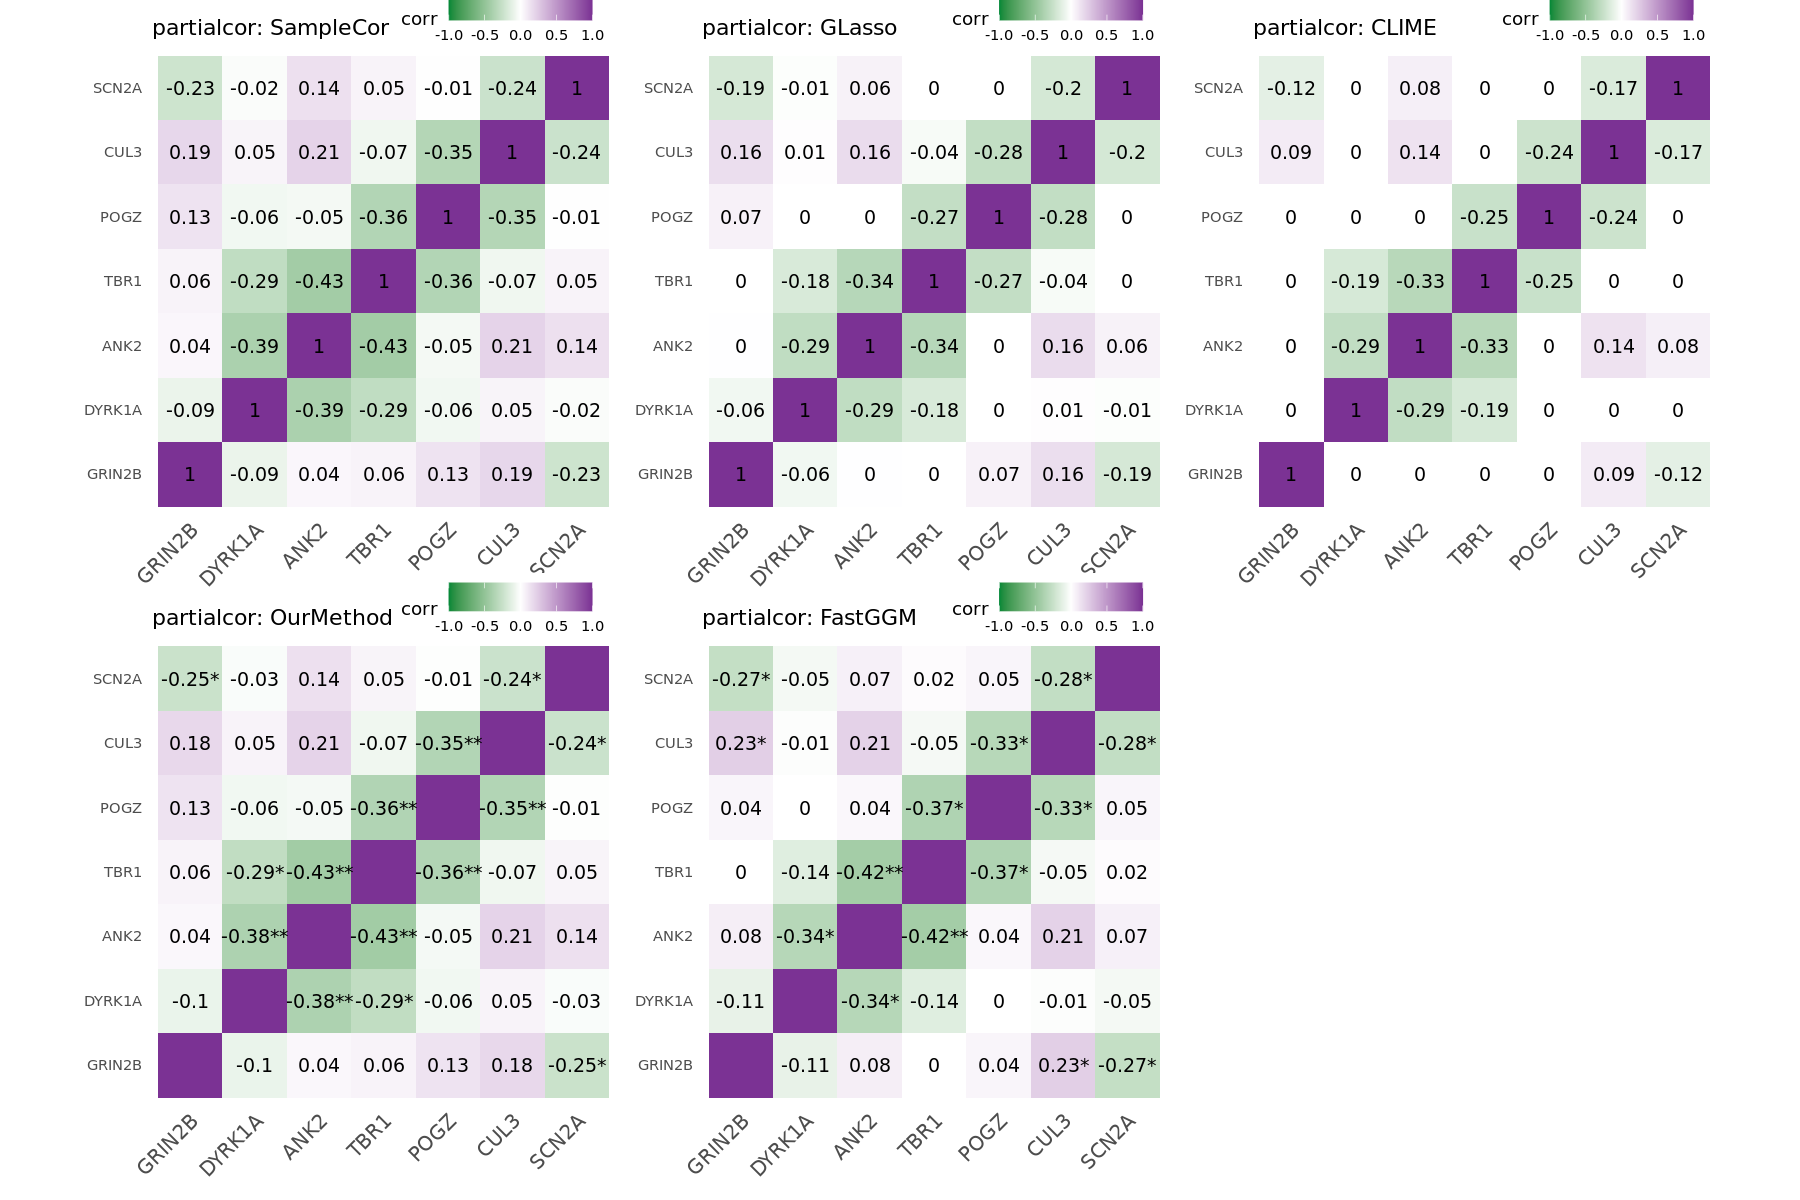

In [934]:
options(repr.plot.width=15, repr.plot.height=10)
  df.prec$Z = c(sample.corr)
  df.prec$S = c(round(sample.corr,2))
p1=plot.partial(df.prec, 'SampleCor')
  df.prec$Z = c(glasso.corr)
  df.prec$S = c(round(glasso.corr,2))
p2=plot.partial(df.prec, 'GLasso')
  df.prec$Z = c(clime.corr)
  df.prec$S = c(round(clime.corr,2))
p3=plot.partial(df.prec, 'CLIME')
  df.prec$Z = c(om.corr)
  df.prec$S = c(om.significant(OM.r2.prd))
p4=plot.partial(df.prec, 'OurMethod')
  df.prec$Z = c(fastggm.corr)
  df.prec$S = c(ant.significant(fastggm.r2.prd))
p5=plot.partial(df.prec, 'FastGGM')

p1+p2+p3+p4+p5

In [968]:
OM.r2.prd

$precision.est
           [,1]        [,2]       [,3]       [,4]       [,5]       [,6]
[1,]  2.0881000  0.25802301 -0.1031985 -0.1515049 -0.3333853 -0.4278295
[2,]  0.2580230  3.50193064  1.3706447  1.0085708  0.2000321 -0.1649743
[3,] -0.1031985  1.37064471  3.7341597  1.5580101  0.1610313 -0.6526391
[4,] -0.1515049  1.00857084  1.5580101  3.5010536  1.1592000  0.2141120
[5,] -0.3333853  0.20003213  0.1610313  1.1592000  2.9803139  0.9947998
[6,] -0.4278295 -0.16497428 -0.6526391  0.2141120  0.9947998  2.6376455
[7,]  0.6528038  0.08812077 -0.5135848 -0.1815180  0.0244354  0.7245578
            [,7]
[1,]  0.65280383
[2,]  0.08812077
[3,] -0.51358481
[4,] -0.18151795
[5,]  0.02443540
[6,]  0.72455785
[7,]  3.39708248

$precision.pval
           [,1]         [,2]         [,3]         [,4]         [,5]        [,6]
[1,] 0.00000000 0.3852164211 7.304556e-01 6.018403e-01 0.2223229335 0.092210825
[2,] 0.38521642 0.0000000000 3.873305e-04 7.672840e-03 0.5714803966 0.622657584
[3,] 0.73045562 

In [935]:
fastggm.r2.prd

2.0726544606,0.2678254403,-0.1919909,0.0008537056,-0.1001268512,-0.49358195,0.71784953
0.2678254403,3.0464488181,0.9704983,0.4055444557,0.0005735387,0.03358007,0.16263877
-0.1919908625,0.9704983487,2.7288863,1.1184435249,-0.1006257619,-0.52355693,-0.20869424
0.0008537056,0.4055444557,1.1184435,2.5707466132,0.9186964441,0.11562638,-0.05633649
-0.1001268512,0.0005735387,-0.1006258,0.9186964441,2.4305319055,0.77761310,-0.13995347
-0.4935819491,0.0335800721,-0.5235569,0.1156263811,0.7776130981,2.25034809,0.76716146
0.7178495279,0.1626387737,-0.2086942,-0.0563364860,-0.1399534723,0.76716146,3.32309392
0.0000000000,-0.1096497759,0.08357263,-0.0003846423,0.0463476701,0.23402575,-0.27405886
-0.1096497759,0.0000000000,-0.30625138,-0.1422135228,-0.0002113494,-0.01337817,-0.05317906
0.0835726306,-0.3062513806,0.00000000,-0.3665583423,0.0391650792,0.21087285,0.07201403
-0.0003846423,-0.1422135228,-0.36655834,0.0000000000,-0.3283917907,-0.04996938,0.02007710


In [948]:
FastGGM_edges(as.matrix(exp.r2.prd), matrix(c(2,4), ncol=2))

$precision
[1] 0.4055445

$partialCor
[1] -0.1422135

$p_precision
[1] 0.1942588

$p_partialCor
[1] 0.1808284

$CI_low_parCor
[1] -0.3505058

$CI_high_parCor
[1] 0.06607872

In [938]:
-cov2cor(fastggm.r2.prd$precision)

-1.000000000,-0.1065838569,0.08072804,-0.000369841,0.0446104334,0.22854460,-0.27352603
-0.106583857,-1.0000000000,-0.33659304,-0.144914516,-0.0002107731,-0.01282507,-0.05111588
0.080728036,-0.3365930433,-1.00000000,-0.422271432,0.0390720139,0.21127414,0.06930211
-0.000369841,-0.1449145155,-0.42227143,-1.000000000,-0.3675291042,-0.04807314,0.01927475
0.044610433,-0.0002107731,0.03907201,-0.367529104,-1.0000000000,-0.33249725,0.04924495
0.228544601,-0.0128250726,0.21127414,-0.048073135,-0.3324972467,-1.00000000,-0.28053730
-0.273526028,-0.0511158797,0.06930211,0.019274753,0.0492449506,-0.28053730,-1.00000000


In [943]:
fastggm.r2.prd$precision[i,j]
fastggm.r2.prd$partialCor[i,j]


[1] 0.4055445

[1] -0.1422135

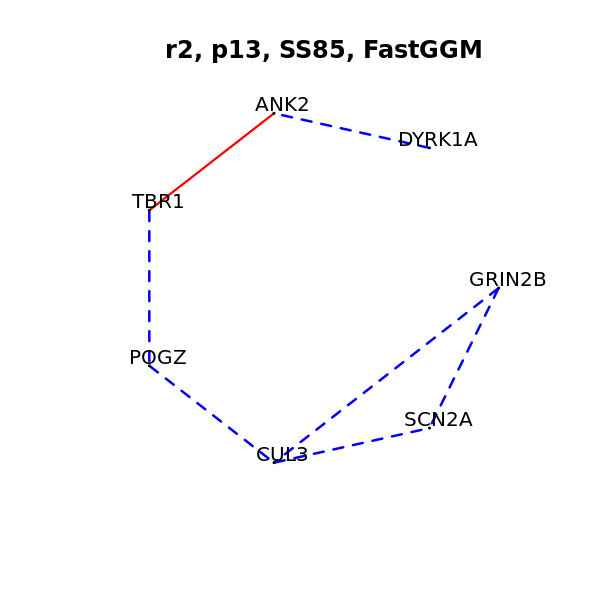

In [860]:
  options(repr.plot.width=5, repr.plot.height=5)
  # estimated graph： fastggm
  set.seed(0)
  net=fastggm.net(fastggm.r2.prd)
  plot(net, vertex.label = colnames(exp.r2.prd), layout = layout_in_circle,
     vertex.size = 1, vertex.color='red', vertex.label.family = "Helvetica", vertex.label.color = "black",
     vertex.label.dist = 1, vertex.label.cex= 1, vertex.shape = "circle",
     edge.width = 2*E(net)$weight, main=paste(c('r2, p', prd, ', SS', dim(exp.r2.prd)[1], ', FastGGM'), collapse = ""))

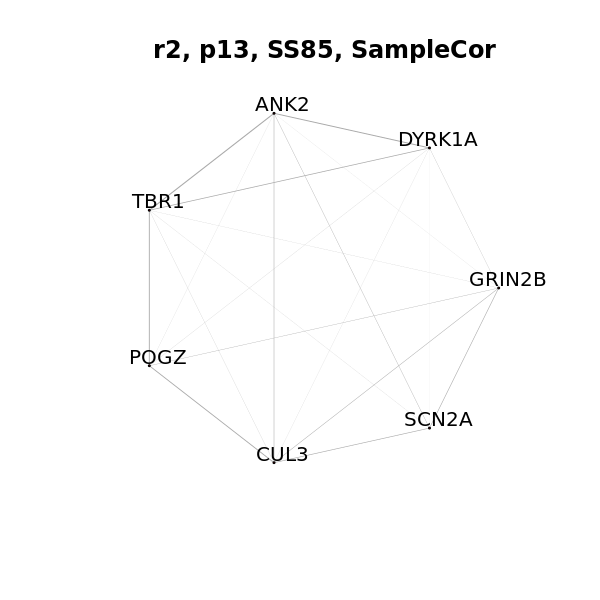

In [868]:
set.seed(0)
adj = abs(sample.corr)
diag(adj)=0
net <- graph_from_adjacency_matrix(adj, mode = "undirected",weighted = TRUE)
  plot(net, vertex.label = colnames(exp.r2.prd), layout = layout_in_circle,
     vertex.size = 1, vertex.color='red', vertex.label.family = "Helvetica", vertex.label.color = "black",
     vertex.label.dist = 1, vertex.label.cex= 1, vertex.shape = "circle",
     edge.width = 2*E(net)$weight, main=paste(c('r2, p', prd, ', SS', dim(exp.r2.prd)[1], ', SampleCor'), collapse = ""))

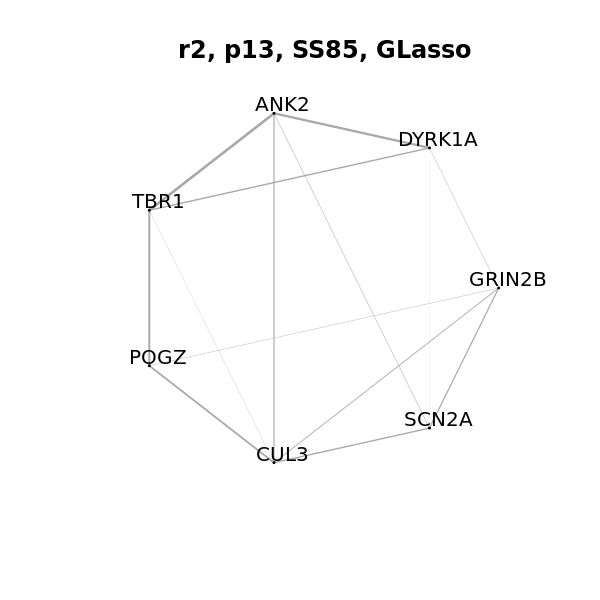

In [865]:
set.seed(0)
GLASSO.adj = abs(GLASSO$wi)
diag(GLASSO.adj)=0
net <- graph_from_adjacency_matrix(GLASSO.adj, mode = "undirected",weighted = TRUE)
  plot(net, vertex.label = colnames(exp.r2.prd), layout = layout_in_circle,
     vertex.size = 1, vertex.color='red', vertex.label.family = "Helvetica", vertex.label.color = "black",
     vertex.label.dist = 1, vertex.label.cex= 1, vertex.shape = "circle",
     edge.width = 2*E(net)$weight, main=paste(c('r2, p', prd, ', SS', dim(exp.r2.prd)[1], ', GLasso'), collapse = ""))

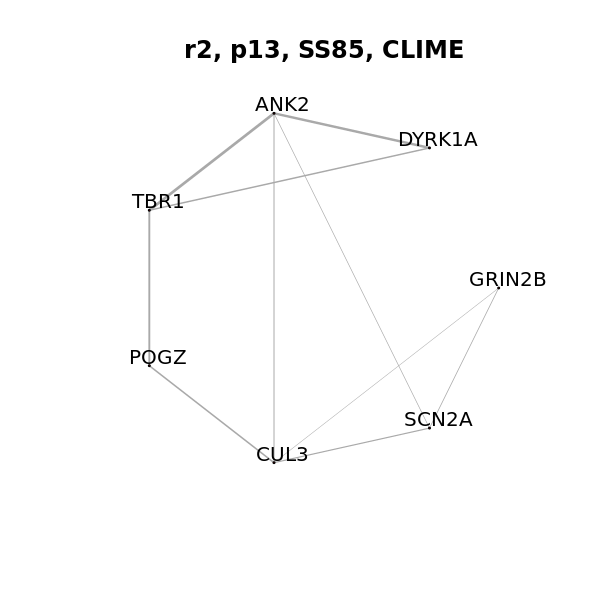

In [870]:
set.seed(0)
adj = abs(clime2$icov)
diag(adj)=0
net <- graph_from_adjacency_matrix(adj, mode = "undirected",weighted = TRUE)
  plot(net, vertex.label = colnames(exp.r2.prd), layout = layout_in_circle,
     vertex.size = 1, vertex.color='red', vertex.label.family = "Helvetica", vertex.label.color = "black",
     vertex.label.dist = 1, vertex.label.cex= 1, vertex.shape = "circle",
     edge.width = 2*E(net)$weight, main=paste(c('r2, p', prd, ', SS', dim(exp.r2.prd)[1], ', CLIME'), collapse = ""))

# Region 3

In [428]:
data.r3 = data[which(data$region=='3'),]
exp.r3 = data.r3[1:genes.asd.num]
options(repr.plot.width=5, repr.plot.height=5)
for(prd in period.list){
  exp.r3.prd = exp.r3[which(data.r3[,'period']==prd),]
  cat(prd, dim(exp.r3.prd)[1], '\n')
  OM.r3.prd = OurMethod(exp.r3.prd)
  fastggm.r3.prd = FastGGM(as.matrix(exp.r3.prd))
#   # estimated graph： our method
#   jpeg(file = paste(c('OurMethod_graph/', 'r3p', prd,'.jpeg'), collapse = ""))
#   set.seed(0)
#   net=get.net(OM.r3.prd)
#   plot(net, vertex.label = colnames(exp.r3.prd), layout = layout_in_circle,
#      vertex.size = 1, vertex.color='red', vertex.label.family = "Helvetica", vertex.label.color = "black",
#      vertex.label.dist = 1, vertex.label.cex= 1, vertex.shape = "circle",
#      edge.width = 2*E(net)$weight, main=paste(c('r3, p', prd, ', SS', dim(exp.r3.prd)[1], ', OM(bc:r, p:b)'), collapse = ""))
#   dev.off()
  # estimated graph： fastggm
  jpeg(file = paste(c('ant_graph/', 'r3p', prd,'.jpeg'), collapse = ""))
  set.seed(0)
  net=fastggm.net(fastggm.r3.prd)
  plot(net, vertex.label = colnames(exp.r3.prd), layout = layout_in_circle,
     vertex.size = 1, vertex.color='red', vertex.label.family = "Helvetica", vertex.label.color = "black",
     vertex.label.dist = 1, vertex.label.cex= 1, vertex.shape = "circle",
     edge.width = 2*E(net)$weight, main=paste(c('r3, p', prd, ', SS', dim(exp.r3.prd)[1], ', ANT(bc:r, p:b)'), collapse = ""))
  dev.off()
  
  # precision
  partial.corr = -cov2cor(OM.r3.prd$precision.est)
  diag(partial.corr) = 1
  df.prec$Z = c(partial.corr)
  df.prec$S = c(get.significant(OM.r3.prd))
#   df.prec[paste('Z', prd, sep='')] = c(partial.corr)
#   df.prec[paste('S', prd, sep='')] = c(get.significant(OM.r3.prd))
  jpeg(file = paste(c('OurMethod_precision/', 'r3p', prd,'.jpeg'), collapse = ""))
  print(ggplot(data = df.prec, aes(Y, X, fill = Z))+ geom_tile(aes(fill = Z)) + coord_fixed() + 
    scale_fill_gradient2(low = "#008837", high = "#7b3294", mid = "white", midpoint = 0, limits=c(-1,1), name='corr') +
    theme(axis.text.x = element_text(angle = 45, vjust = 1, size = 12, hjust = 1), axis.title.x = element_blank(), axis.title.y = element_blank(), panel.grid.major = element_blank(), panel.border = element_blank(), panel.background = element_blank(),axis.ticks = element_blank(),
      legend.justification = c(1, 0), legend.position = c(0.97, 0.99), legend.direction = "horizontal") +
    geom_text(aes(Y, X, label = S), color = "black", size = 4)+ggtitle(paste(c('partial corr: r3', ' p', prd), collapse = "")))
  dev.off()
}

3.5 52 
6.7 45 
8.9 24 
10.12 27 
13 39 
14 16 
15 18 


# Region 4

In [429]:
data.r4 = data[which(data$region=='4'),]
exp.r4 = data.r4[1:genes.asd.num]
options(repr.plot.width=5, repr.plot.height=5)
for(prd in period.list){
  exp.r4.prd = exp.r4[which(data.r4[,'period']==prd),]
  cat(prd, dim(exp.r4.prd)[1], '\n')
  OM.r4.prd = OurMethod(exp.r4.prd)
  fastggm.r4.prd = FastGGM(as.matrix(exp.r4.prd))
#   # estimated graph： our method
#   jpeg(file = paste(c('OurMethod_graph/', 'r4p', prd,'.jpeg'), collapse = ""))
#   set.seed(0)
#   net=get.net(OM.r4.prd)
#   plot(net, vertex.label = colnames(exp.r4.prd), layout = layout_in_circle,
#      vertex.size = 1, vertex.color='red', vertex.label.family = "Helvetica", vertex.label.color = "black",
#      vertex.label.dist = 1, vertex.label.cex= 1, vertex.shape = "circle",
#      edge.width = 2*E(net)$weight, main=paste(c('r4, p', prd, ', SS', dim(exp.r4.prd)[1], ', OM(bc:r, p:b)'), collapse = ""))
#   dev.off()
  # estimated graph： fastggm
  jpeg(file = paste(c('ant_graph/', 'r4p', prd,'.jpeg'), collapse = ""))
  set.seed(0)
  net=fastggm.net(fastggm.r4.prd)
  plot(net, vertex.label = colnames(exp.r4.prd), layout = layout_in_circle,
     vertex.size = 1, vertex.color='red', vertex.label.family = "Helvetica", vertex.label.color = "black",
     vertex.label.dist = 1, vertex.label.cex= 1, vertex.shape = "circle",
     edge.width = 2*E(net)$weight, main=paste(c('r4, p', prd, ', SS', dim(exp.r4.prd)[1], ', ANT(bc:r, p:b)'), collapse = ""))
  dev.off()
  
  # precision
  partial.corr = -cov2cor(OM.r4.prd$precision.est)
  diag(partial.corr) = 1
  df.prec$Z = c(partial.corr)
  df.prec$S = c(get.significant(OM.r4.prd))
#   df.prec[paste('Z', prd, sep='')] = c(partial.corr)
#   df.prec[paste('S', prd, sep='')] = c(get.significant(OM.r4.prd))
  jpeg(file = paste(c('OurMethod_precision/', 'r4p', prd,'.jpeg'), collapse = ""))
  print(ggplot(data = df.prec, aes(Y, X, fill = Z))+ geom_tile(aes(fill = Z)) + coord_fixed() + 
    scale_fill_gradient2(low = "#008837", high = "#7b3294", mid = "white", midpoint = 0, limits=c(-1,1), name='corr') +
    theme(axis.text.x = element_text(angle = 45, vjust = 1, size = 12, hjust = 1), axis.title.x = element_blank(), axis.title.y = element_blank(), panel.grid.major = element_blank(), panel.border = element_blank(), panel.background = element_blank(),axis.ticks = element_blank(),
      legend.justification = c(1, 0), legend.position = c(0.97, 0.99), legend.direction = "horizontal") +
    geom_text(aes(Y, X, label = S), color = "black", size = 4)+ggtitle(paste(c('partial corr: r4', ' p', prd), collapse = "")))
  dev.off()
}

3.5 23 
6.7 31 
8.9 18 
10.12 20 
13 27 
14 11 
15 11 


In [991]:
OM.r1.prd

$precision.est
            [,1]        [,2]        [,3]        [,4]        [,5]        [,6]
[1,]  1.63903263  0.64060226 -0.08859631 -0.23287304 -0.53283599 -0.87450571
[2,]  0.64060226  2.93823423  1.77977914  0.85987593 -0.09252608 -0.96038632
[3,] -0.08859631  1.77977914  4.64423730  1.70398336  0.33099695 -0.63865289
[4,] -0.23287304  0.85987593  1.70398336  3.32718388  1.22193058 -0.02787289
[5,] -0.53283599 -0.09252608  0.33099695  1.22193058  3.92678120  1.91912186
[6,] -0.87450571 -0.96038632 -0.63865289 -0.02787289  1.91912186  3.56442561
[7,]  0.25452368 -0.25892630 -0.84583163 -0.37859441  0.57093803  0.57207287
           [,7]
[1,]  0.2545237
[2,] -0.2589263
[3,] -0.8458316
[4,] -0.3785944
[5,]  0.5709380
[6,]  0.5720729
[7,]  3.3246189

$precision.pval
           [,1]         [,2]         [,3]        [,4]         [,5]         [,6]
[1,] 0.00000000 0.0256808951 0.7976334079 0.428867737 0.1000041065 0.0065366796
[2,] 0.02568090 0.0000000000 0.0006197998 0.036667233 0.82785365

# (DYRK1A, ANK2), i.e., (2, 3): compare partial correlation varied by time, estimated from single group or meta-analysis

In [175]:
# many-to-one meta-analysis
meta.multi<-function(P, om.base, om.list){
  amount = length(om.list)
  test.pval.list = replicate(amount, matrix(0, P, P), simplify=F)
  om.meta.rho = matrix(0, P, P)
  om.meta.rho.se = matrix(0, P, P)
  om.meta.rho.pval = matrix(0, P, P)
  om.meta.prec1 = om.base$precision.est
  om.meta.pc1 = prec2pc(om.meta.prec1)
  om.meta.prec.list = list()
  om.meta.edge.list = list()
  for(a in 1:amount){
    om.meta.prec.list[[a]] = om.list[[a]]$precision.est
  }
  for(i in 1:(P-1)){
    for(j in (i+1):P){
      rho1 = om.base$rho.est[i,j]
      rho.se1 = om.base$rho.se[i,j]
      rho.list = c(rho1)
      w.list = c(1/(rho.se1^2))
      ind.list = c()
      for(a in 1:amount){
        rho2 = om.list[[a]]$rho.est[i,j]
        rho.se2 = om.list[[a]]$rho.se[i,j]
        test.stat = (rho1 - rho2) / sqrt( rho.se1^2 + rho.se2^2 )
        test.pval = pchisq(test.stat^2, 1, lower.tail = F)
#         if(is.na(test.pval)==TRUE) cat(a,rho1,rho.se1,rho2,rho.se2,test.stat,test.pval,'\n')
        test.pval.list[[a]][i,j] = test.pval.list[[a]][j,i] = test.pval
        if(is.na(test.pval)==FALSE & test.pval>=0.05){
          rho.list = c(rho.list, rho2)
          w.list = c(w.list, 1/(rho.se2^2))
          ind.list = c(ind.list, a)
        }
#         cat('\t', a, test.pval)
      }
#       cat('\n', rho.list, '\n')
#       if(i==2 & j==3) cat('index of list used for meta:', ind.list, '\n')
      if(length(rho.list)==1){
        meta.rho = NaN
        meta.rho.se = NaN
        meta.rho.pval = NaN
      }
      else{
        w.sum = sum(w.list)
        meta.rho = sum(w.list * rho.list) / w.sum
        meta.rho.se = 1 / sqrt(w.sum)
        meta.rho.pval = pchisq((meta.rho / meta.rho.se)^2, 1, lower.tail = F)
        
        eta1 = meta.rho * sqrt(om.base$sigma.a2[i,j]) * sqrt(om.base$sigma.b2[i,j])
        prec1 = solve( matrix(c(om.base$sigma.a2[i,j], eta1, eta1, om.base$sigma.b2[i,j]), 2, 2) )
        om.meta.prec1[i,j] = om.meta.prec1[j,i] = prec1[1,2]
        om.meta.pc1[i,j] = om.meta.pc1[j,i] = meta.rho
        
        for(a in ind.list){
          eta2 = meta.rho * sqrt(om.list[[a]]$sigma.a2[i,j]) * sqrt(om.list[[a]]$sigma.b2[i,j])
          prec2 = solve( matrix(c(om.list[[a]]$sigma.a2[i,j], eta2, eta2, om.list[[a]]$sigma.b2[i,j]), 2, 2) )
          om.meta.prec.list[[a]][i,j] = om.meta.prec.list[[a]][j,i] = prec2[1,2]
        }
      }
      om.meta.rho[i,j] = om.meta.rho[j,i] = meta.rho
      om.meta.rho.se[i,j] = om.meta.rho.se[j,i] = meta.rho.se
      om.meta.rho.pval[i,j] = om.meta.rho.pval[j,i] = meta.rho.pval
    }
  }
  
  om.meta.edge = get.bonferroni(om.meta.rho.pval)
  om.edge1 = get.bonferroni(om.base$precision.pval)
  om.meta.edge1 = om.meta.edge
  om.meta.edge1[ which(is.na(om.meta.edge1)) ] = om.edge1[ which(is.na(om.meta.edge1)) ]
  cat('Increased edges after meta in group 1:', sum((1-om.edge1)*om.meta.edge1)/2,'\t')
  cat('Decreased edges after meta in group 1:', sum(om.edge1*(1-om.meta.edge1))/2,'\n')
  
  for(a in 1:amount){
    cat('null cases:', length(test.pval.list[[a]][test.pval.list[[a]]>0.05])/2, '/', P*(P-1)/2, '\n')
    om.edge2 = get.bonferroni(om.list[[a]]$precision.pval)
    om.meta.edge.list[[a]] = om.meta.edge
    om.meta.edge.list[[a]][test.pval.list[[a]]<0.05] = NA
    om.meta.edge.list[[a]][ which(is.na(om.meta.edge.list[[a]])) ] = om.edge2[ which(is.na(om.meta.edge.list[[a]])) ]
    cat('\tIncreased edges after meta in group list', a, sum((1-om.edge2)*om.meta.edge.list[[a]])/2,'\t')
    cat('\tDecreased edges after meta in group list', a, sum(om.edge2*(1-om.meta.edge.list[[a]]))/2,'\n')
  }

  list(prec1 = om.meta.prec1, pc1 = om.meta.pc1, prec.list = om.meta.prec.list,
       rho = om.meta.rho, rho.se = om.meta.rho.se, rho.pval = om.meta.rho.pval, test.pval.list = test.pval.list,
       edge1 = om.meta.edge1, edge.list = om.meta.edge.list, meta.edge = om.meta.edge)
}

In [252]:
# DYRK1A, ANK2: 2,3
# i=2
# j=3
# POGZ, CUL3: 5,6
# i=5
# j=6
# GRIN2B, POGZ: 1, 5
i=1
j=5

r1.prec = c()
r2.prec = c()
r3.prec = c()
r4.prec = c()
r1.part = c()
r2.part = c()
r3.part = c()
r4.part = c()
r1.part.se = c()
r2.part.se = c()
r3.part.se = c()
r4.part.se = c()

r2.meta.pc = c()
r2.meta.pc.se = c()

meta.list = list()
for(prd in period.list){
  print(prd)
  exp.r1.prd = exp.r1[which(data.r1[,'period']==prd),]
  OM.r1.prd = OurMethod(exp.r1.prd, infer='wald')
  r1.prec = c(r1.prec, OM.r1.prd$precision.est[i,j])
  r1.part = c(r1.part, OM.r1.prd$rho.est[i,j])
  r1.part.se = c(r1.part.se, OM.r1.prd$rho.se[i,j])
  exp.r2.prd = exp.r2[which(data.r2[,'period']==prd),]
  OM.r2.prd = OurMethod(exp.r2.prd, infer='wald')
  r2.prec = c(r2.prec, OM.r2.prd$precision.est[i,j])
  r2.part = c(r2.part, OM.r2.prd$rho.est[i,j])
  r2.part.se = c(r2.part.se, OM.r2.prd$rho.se[i,j])
  exp.r3.prd = exp.r3[which(data.r3[,'period']==prd),]
  OM.r3.prd = OurMethod(exp.r3.prd, infer='wald')
  r3.prec = c(r3.prec, OM.r3.prd$precision.est[i,j])
  r3.part = c(r3.part, OM.r3.prd$rho.est[i,j])
  r3.part.se = c(r3.part.se, OM.r3.prd$rho.se[i,j])
  exp.r4.prd = exp.r4[which(data.r4[,'period']==prd),]
  OM.r4.prd = OurMethod(exp.r4.prd, infer='wald')
  r4.prec = c(r4.prec, OM.r4.prd$precision.est[i,j])
  r4.part = c(r4.part, OM.r4.prd$rho.est[i,j])
  r4.part.se = c(r4.part.se, OM.r4.prd$rho.se[i,j])
  
#   meta.21y.19y20y=meta.multi(P, om.21y, list(om.19y, om.20y))
  meta.prd = meta.multi(P, OM.r2.prd, list(OM.r1.prd, OM.r3.prd, OM.r4.prd))
  meta.list[[prd]] = meta.prd
  r2.meta.pc = c(r2.meta.pc, meta.prd$rho[i,j])
  r2.meta.pc.se = c(r2.meta.pc.se, meta.prd$rho.se[i,j])
  print(meta.prd$edge1[i,j])
}

[1] 3.5
Increased edges after meta in group 1: 6 	Decreased edges after meta in group 1: 0 
null cases: 18 / 21 
	Increased edges after meta in group list 1 4 		Decreased edges after meta in group list 1 0 
null cases: 17 / 21 
	Increased edges after meta in group list 2 5 		Decreased edges after meta in group list 2 0 
null cases: 17 / 21 
	Increased edges after meta in group list 3 7 		Decreased edges after meta in group list 3 0 
[1] 0
[1] 6.7
Increased edges after meta in group 1: 7 	Decreased edges after meta in group 1: 0 
null cases: 21 / 21 
	Increased edges after meta in group list 1 8 		Decreased edges after meta in group list 1 0 
null cases: 17 / 21 
	Increased edges after meta in group list 2 10 		Decreased edges after meta in group list 2 0 
null cases: 17 / 21 
	Increased edges after meta in group list 3 11 		Decreased edges after meta in group list 3 0 
[1] 1
[1] 8.9
Increased edges after meta in group 1: 6 	Decreased edges after meta in group 1: 0 
null cases: 19 / 21 

In [253]:
for(prd in period.list){
  meta.prd = meta.list[[prd]]
#   meta.prd$edge1
#   brain.graph(genes.asd, meta.prd$pc1*meta.prd$edge1, 'OurMethod.meta', method='om.meta')
  brain.graph(genes.asd, meta.prd$pc1*meta.prd$edge1, paste(c('meta: p', prd, '; bc:r'), collapse = ""),
              'om.meta', OM.r1.prd$precision.pval, path='graph_meta/', filename=paste(c('p', prd), collapse = ""))
}

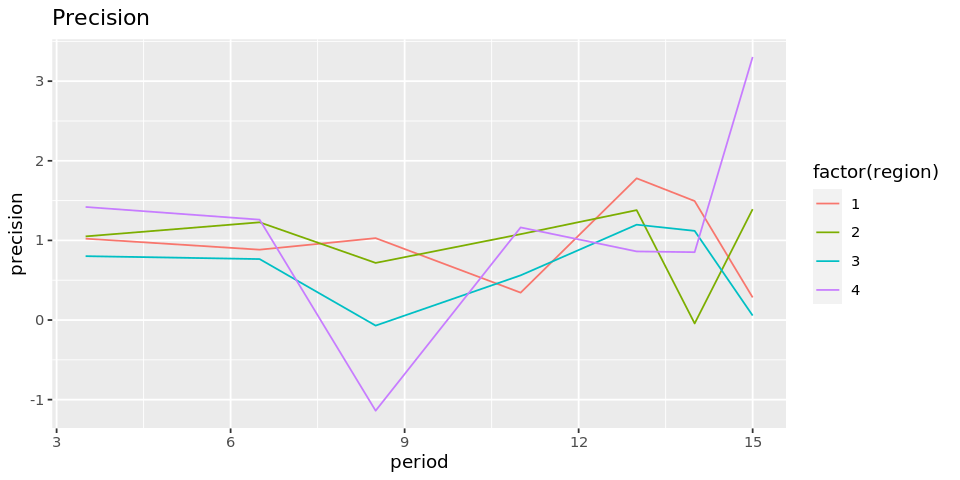

In [156]:
options(repr.plot.width=8, repr.plot.height=4)
# df=data.frame(period=rep(c(3.5, 6.7, 8.9, 10.12, 13, 14, 15), 4), 
df=data.frame(period=rep(c(3.5, 6.5, 8.5, 11, 13, 14, 15), 4), 
              precision=c(r1.prec, r2.prec, r3.prec, r4.prec),
              region=c(rep(1, 7), rep(2, 7), rep(3, 7), rep(4, 7)))
ggplot(data=df, mapping=aes(x=period, y=precision, color=factor(region)))+ geom_line() + ggtitle('Precision')

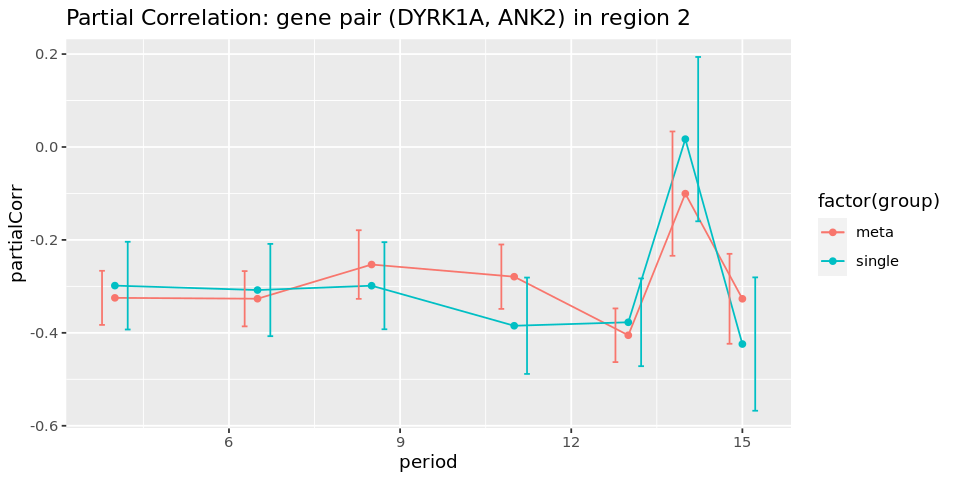

In [157]:
options(repr.plot.width=8, repr.plot.height=4)
df=data.frame(period=rep(c(4, 6.5, 8.5, 11, 13, 14, 15), 2), 
              partialCorr=c(r2.part, r2.meta.pc),
              partialCorrSe=c(r2.part.se, r2.meta.pc.se),
              group=c(rep('single', 7), rep('meta', 7)))
ggplot(data=df, mapping=aes(x=period, y=partialCorr, color=factor(group)))+ geom_point() + geom_line() +
ggtitle('Partial Correlation: gene pair (DYRK1A, ANK2) in region 2') +
  geom_errorbar(aes(ymin=partialCorr-partialCorrSe, ymax=partialCorr+partialCorrSe), width=.2, position=position_dodge(.9))

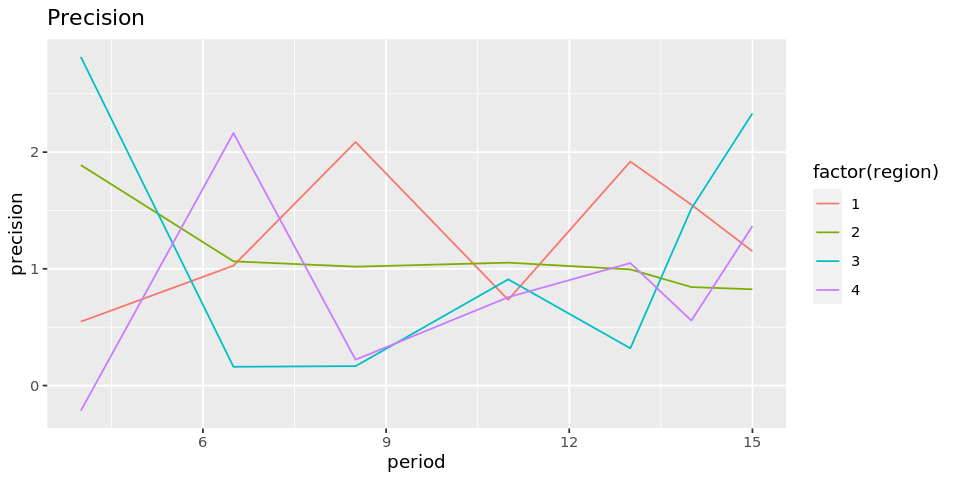

In [153]:
# options(repr.plot.width=8, repr.plot.height=4)
# # df=data.frame(period=rep(c(3.5, 6.7, 8.9, 10.12, 13, 14, 15), 4), 
# df=data.frame(period=rep(c(4, 6.5, 8.5, 11, 13, 14, 15), 4), 
#               precision=c(r1.prec, r2.prec, r3.prec, r4.prec),
#               region=c(rep(1, 7), rep(2, 7), rep(3, 7), rep(4, 7)))
# ggplot(data=df, mapping=aes(x=period, y=precision, color=factor(region)))+ geom_line() + ggtitle('Precision')

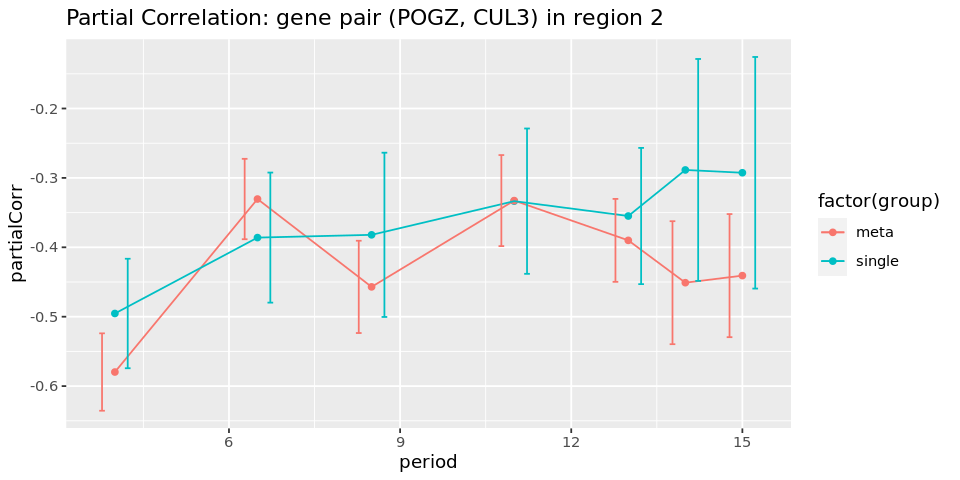

In [154]:
# options(repr.plot.width=8, repr.plot.height=4)
# df=data.frame(period=rep(c(4, 6.5, 8.5, 11, 13, 14, 15), 2), 
#               partialCorr=c(r2.part, r2.meta.pc),
#               partialCorrSe=c(r2.part.se, r2.meta.pc.se),
#               group=c(rep('single', 7), rep('meta', 7)))
# ggplot(data=df, mapping=aes(x=period, y=partialCorr, color=factor(group)))+ geom_point() + geom_line() +
# ggtitle('Partial Correlation: gene pair (POGZ, CUL3) in region 2') +
#   geom_errorbar(aes(ymin=partialCorr-partialCorrSe, ymax=partialCorr+partialCorrSe), width=.2, position=position_dodge(.9))

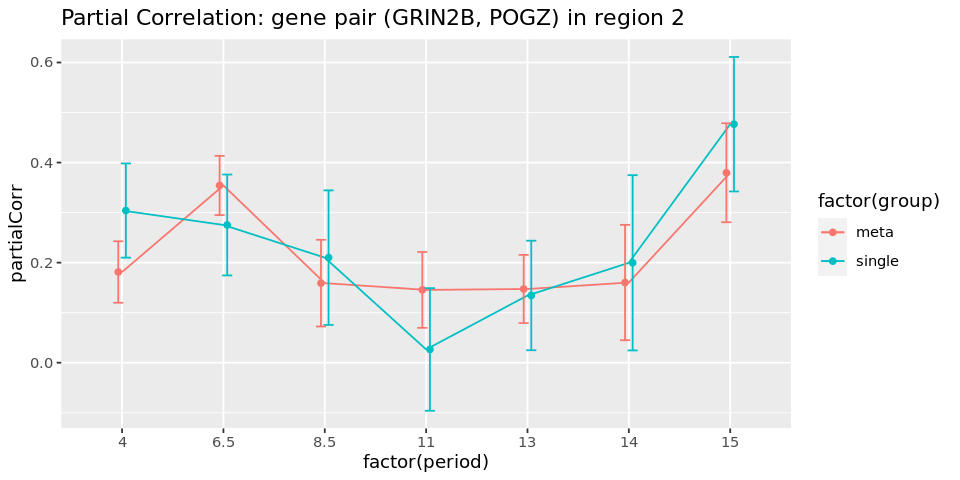

In [267]:
options(repr.plot.width=8, repr.plot.height=4)
# df=data.frame(period=rep(c(4, 6.5, 8.5, 11, 13, 14, 15), 2), 
df=data.frame(period=rep(c('period 3-5', 'period 6-7', 8.5, 11, 13, 14, 15), 2), 
              partialCorr=c(r2.part, r2.meta.pc),
              partialCorrSe=c(r2.part.se, r2.meta.pc.se),
              group=c(rep('single', 7), rep('meta', 7)))
ggplot(data=df, mapping=aes(x=factor(period), y=partialCorr, color=factor(group)))+
  geom_point(position=position_dodge(.15)) + geom_line(aes(group=factor(group))) +
ggtitle('Partial Correlation: gene pair (GRIN2B, POGZ) in region 2') +
  geom_errorbar(aes(ymin=partialCorr-partialCorrSe, ymax=partialCorr+partialCorrSe), width=.2, position=position_dodge(.15))
#   geom_errorbar(aes(ymin=partialCorr-partialCorrSe, ymax=partialCorr+partialCorrSe), width=.2)
# label...

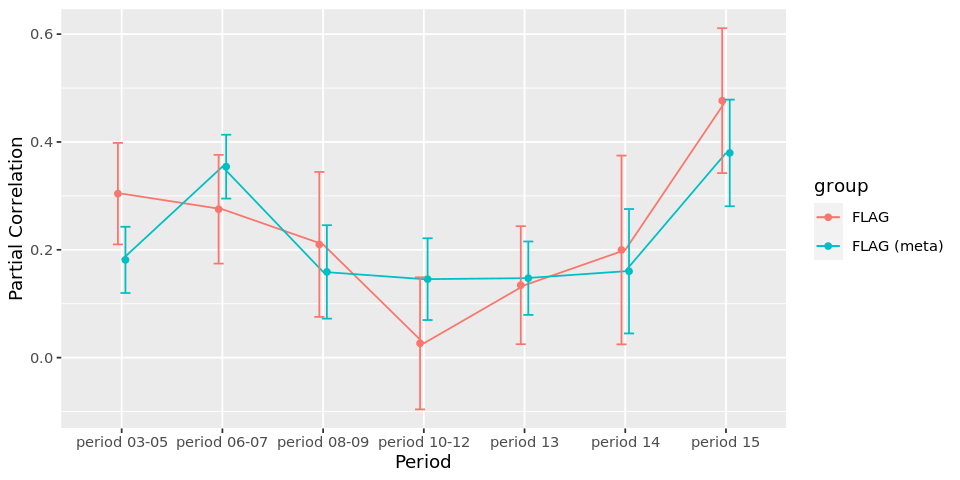

In [279]:
options(repr.plot.width=8, repr.plot.height=4)
# df=data.frame(period=rep(c(4, 6.5, 8.5, 11, 13, 14, 15), 2), 
df=data.frame(period=rep(c('period 03-05', 'period 06-07', 'period 08-09', 'period 10-12', 'period 13', 'period 14', 'period 15'), 2), 
              partialCorrelation=c(r2.part, r2.meta.pc),
              partialCorrSe=c(r2.part.se, r2.meta.pc.se),
              group=c(rep('FLAG', 7), rep('FLAG (meta)', 7)))
ggplot(data=df, mapping=aes(x=period, y=partialCorrelation, color=group))+ ylab('Partial Correlation') + xlab('Period') +
  geom_point(position=position_dodge(.15)) + geom_line(aes(group=group)) +
# ggtitle('Partial Correlation: gene pair (GRIN2B, POGZ) in region 2') +
  geom_errorbar(aes(ymin=partialCorrelation-partialCorrSe, ymax=partialCorrelation+partialCorrSe), width=.2, position=position_dodge(.15))
#   geom_errorbar(aes(ymin=partialCorr-partialCorrSe, ymax=partialCorr+partialCorrSe), width=.2)

# compare with other methods

In [246]:
mle.pc
which(mle.pc>0)

,GRIN2B,DYRK1A,ANK2,TBR1,POGZ,CUL3,SCN2A
GRIN2B,1.00000000,-0.16837348,0.01722677,-0.087801836,0.46044240,0.02690792,-0.156529029
DYRK1A,-0.16837348,1.00000000,-0.45992158,-0.240371964,0.04780716,-0.01023213,-0.207899667
ANK2,0.01722677,-0.45992158,1.00000000,-0.332487070,0.02579380,-0.07458487,-0.199315780
TBR1,-0.08780184,-0.24037196,-0.33248707,1.000000000,0.05150135,0.13425314,0.009249613
POGZ,0.46044240,0.04780716,0.02579380,0.051501352,1.00000000,-0.28194128,-0.025340868
CUL3,0.02690792,-0.01023213,-0.07458487,0.134253143,-0.28194128,1.00000000,-0.299930168
SCN2A,-0.15652903,-0.20789967,-0.19931578,0.009249613,-0.02534087,-0.29993017,1.000000000


[1]  1  3  5  6  9 12 15 17 19 25 26 27 28 29 30 31 32 33 36 39 41 46 49

In [249]:
# DYRK1A, ANK2: 2,3
# i=2
# j=3
# POGZ, CUL3: 5,6
# i=5
# j=6
# GRIN2B, POGZ: 1, 5
i=1
j=5


mle.list=c()
clime.list=c()
om.list=c()
fastggm.list=c()
glasso.list=c()
bggm.list=c()
for(prd in period.list){
  print(prd)

  exp.r2.prd = exp.r2[which(data.r2[,'period']==prd),]
  exp.r2.prd = as.matrix(exp.r2.prd)
  
  mle.prec = run.mle(exp.r2.prd)
  mle.pc = prec2pc(mle.prec)
  mle.list = c(mle.list, mle.pc[i,j])
  
  clime.prec = run.clime(exp.r2.prd, lambda=0.1)$icov
  clime.pc = prec2pc(clime.prec)
  clime.list = c(clime.list, clime.pc[i,j])
  
  OM.r2.prd = OurMethod(exp.r2.prd, infer='wald')
  om.list = c(om.list, OM.r2.prd$rho.est[i,j])
  
  fastggm.2.13 = FastGGM::FastGGM(exp.r2.prd)
  fastggm.prec = fastggm.2.13$precision
  fastggm.pc = prec2pc(fastggm.prec)
  fastggm.list = c(fastggm.list, fastggm.pc[i,j])
  
  glasso.prec = run.glasso(exp.r2.prd)$wi
  glasso.pc = prec2pc(glasso.prec)
  glasso.list = c(glasso.list, glasso.pc[i,j])
  
  bggm = run.bggm(exp.r2.prd)
  bggm.prec = bggm$precision
  bggm.pc = prec2pc(bggm$precision)
#   bggm.edge = get.adj(bggm$edge)
  bggm.list = c(bggm.list, bggm.pc[i,j])
  
}

[1] 3.5
Allocating memory 
start recovering 
preparing precision and path matrix list 
Done! 
  |======================================================================| 100%[1] 6.7
Allocating memory 
start recovering 
preparing precision and path matrix list 
Done! 

  |======================================================================| 100%or decreasing lam.min.ratio![1] 8.9
Allocating memory 
start recovering 
preparing precision and path matrix list 
Done! 

  |======================================================================| 100%or decreasing lam.min.ratio![1] 10.12
Allocating memory 
start recovering 
preparing precision and path matrix list 
Done! 
  |======================================================================| 100%[1] 13
Allocating memory 
start recovering 
preparing precision and path matrix list 
Done! 

  |======================================================================| 100%or decreasing lam.min.ratio![1] 14
Allocating memory 
start recovering 
pre

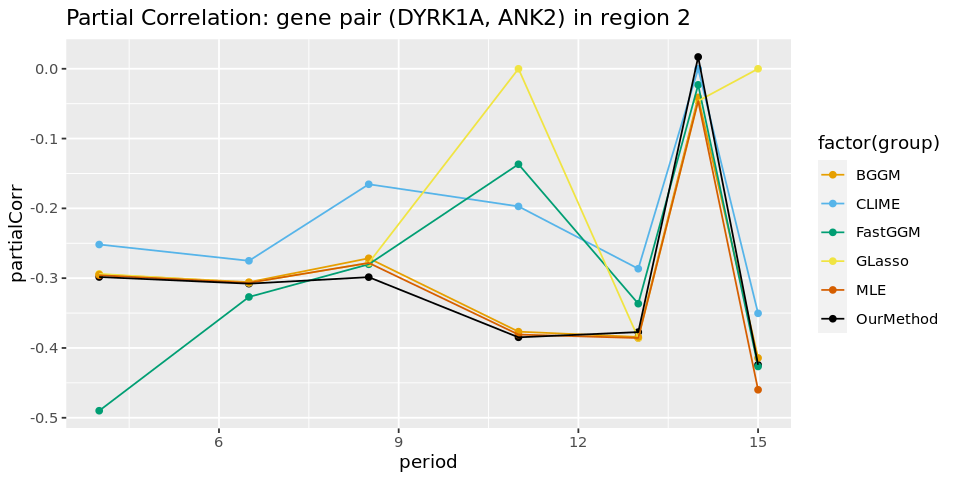

In [237]:
# options(repr.plot.width=8, repr.plot.height=4)
# len = length(r2.part)
# df=data.frame(period=rep(c(4, 6.5, 8.5, 11, 13, 14, 15), 6), 
#       partialCorr=c(r2.part, mle.list, clime.list, fastggm.list, glasso.list, bggm.list),
# #       partialCorrSe=c(r2.part.se, rep(0,len), rep(0,len), rep(0,len), rep(0,len), rep(0,len)),
#       group=c(rep('OurMethod', len), rep('MLE', len), rep('CLIME', len), rep('FastGGM', len), rep('GLasso', len), rep('BGGM', len)))
# ggplot(data=df, mapping=aes(x=period, y=partialCorr, color=factor(group)))+ geom_point() + geom_line() +
# ggtitle('Partial Correlation: gene pair (DYRK1A, ANK2) in region 2') +
# #   geom_errorbar(aes(ymin=partialCorr-partialCorrSe, ymax=partialCorr+partialCorrSe), width=.2, position=position_dodge(.9))
# scale_colour_manual(values = c("#E69F00", "#56B4E9", "#009E73", "#F0E442", "#D55E00", "#000000", "#CC79A7"))

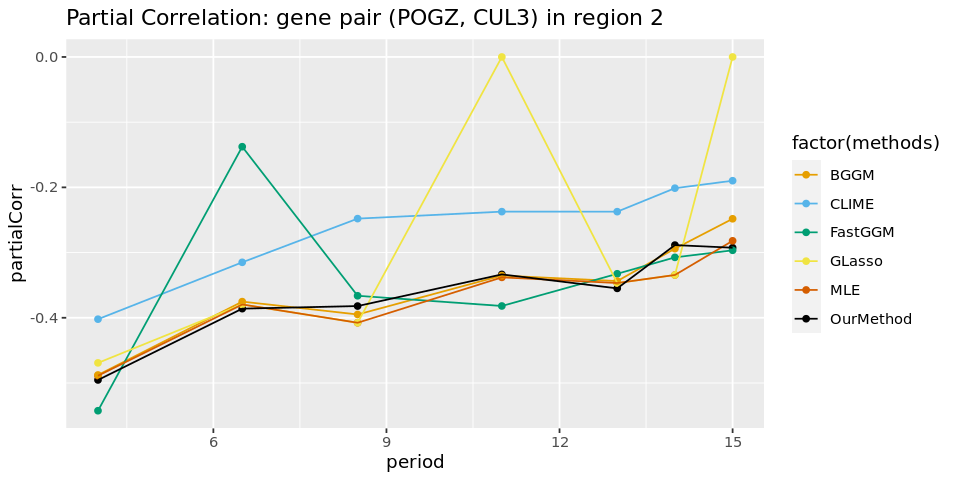

In [242]:
# options(repr.plot.width=8, repr.plot.height=4)
# len = length(r2.part)
# df=data.frame(period=rep(c(4, 6.5, 8.5, 11, 13, 14, 15), 6), 
#       partialCorr=c(r2.part, mle.list, clime.list, fastggm.list, glasso.list, bggm.list),
#       methods=c(rep('OurMethod', len), rep('MLE', len), rep('CLIME', len), rep('FastGGM', len), rep('GLasso', len), rep('BGGM', len)))
# ggplot(data=df, mapping=aes(x=period, y=partialCorr, color=factor(methods)))+ geom_point() + geom_line() +
# ggtitle('Partial Correlation: gene pair (POGZ, CUL3) in region 2') +
# scale_colour_manual(values = c("#E69F00", "#56B4E9", "#009E73", "#F0E442", "#D55E00", "#000000", "#CC79A7"))

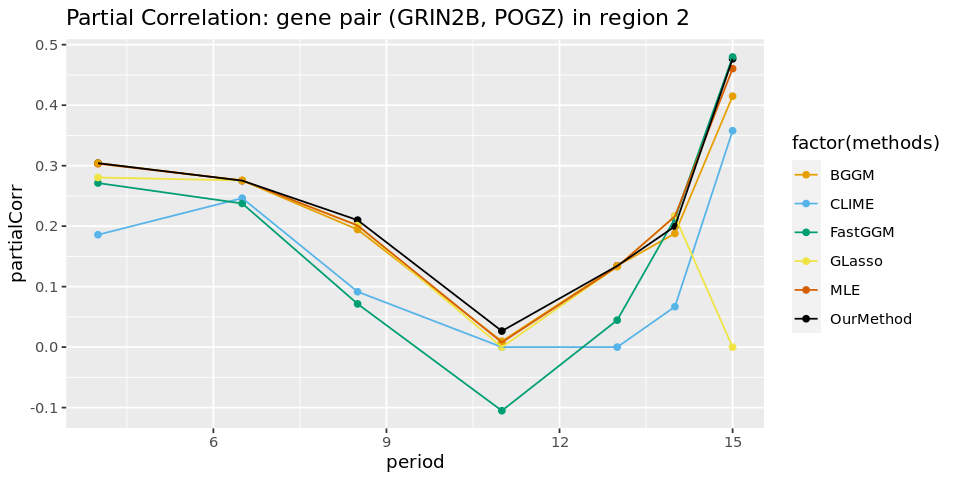

In [251]:
options(repr.plot.width=8, repr.plot.height=4)
len = length(r2.part)
df=data.frame(period=rep(c(4, 6.5, 8.5, 11, 13, 14, 15), 6), 
      partialCorr=c(om.list, mle.list, clime.list, fastggm.list, glasso.list, bggm.list),
      methods=c(rep('OurMethod', len), rep('MLE', len), rep('CLIME', len), rep('FastGGM', len), rep('GLasso', len), rep('BGGM', len)))
ggplot(data=df, mapping=aes(x=period, y=partialCorr, color=factor(methods)))+ geom_point() + geom_line() +
ggtitle('Partial Correlation: gene pair (GRIN2B, POGZ) in region 2') +
scale_colour_manual(values = c("#E69F00", "#56B4E9", "#009E73", "#F0E442", "#D55E00", "#000000", "#CC79A7"))

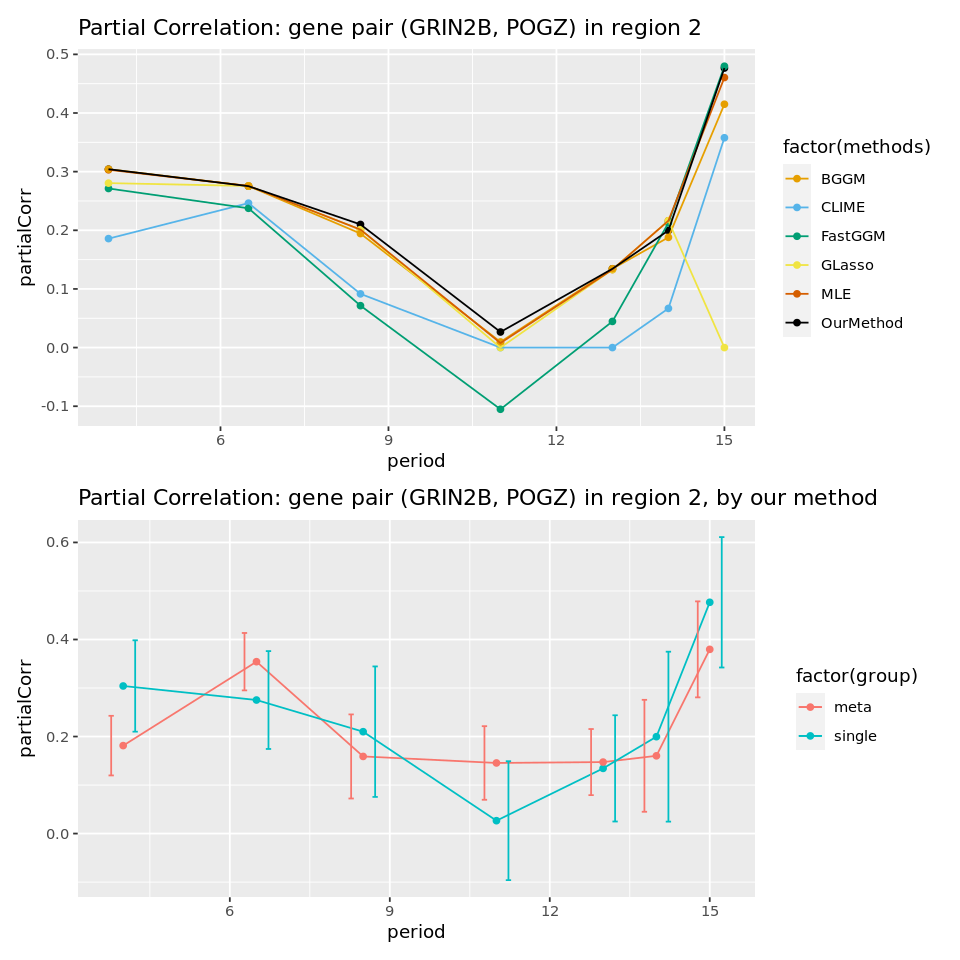

In [258]:
options(repr.plot.width=8, repr.plot.height=8)
len = length(r2.part)
df=data.frame(period=rep(c(4, 6.5, 8.5, 11, 13, 14, 15), 6), 
      partialCorr=c(om.list, mle.list, clime.list, fastggm.list, glasso.list, bggm.list),
      methods=c(rep('OurMethod', len), rep('MLE', len), rep('CLIME', len), rep('FastGGM', len), rep('GLasso', len), rep('BGGM', len)))
# options(repr.plot.width=8, repr.plot.height=4)
df1=data.frame(period=rep(c(4, 6.5, 8.5, 11, 13, 14, 15), 2), 
              partialCorr=c(r2.part, r2.meta.pc),
              partialCorrSe=c(r2.part.se, r2.meta.pc.se),
              group=c(rep('single', 7), rep('meta', 7)))
ggplot(data=df, mapping=aes(x=period, y=partialCorr, color=factor(methods)))+ geom_point() + geom_line() +
ggtitle('Partial Correlation: gene pair (GRIN2B, POGZ) in region 2') +
scale_colour_manual(values = c("#E69F00", "#56B4E9", "#009E73", "#F0E442", "#D55E00", "#000000", "#CC79A7")) +
ggplot(data=df1, mapping=aes(x=period, y=partialCorr, color=factor(group)))+ geom_point() + geom_line() +
ggtitle('Partial Correlation: gene pair (GRIN2B, POGZ) in region 2, by our method') +
  geom_errorbar(aes(ymin=partialCorr-partialCorrSe, ymax=partialCorr+partialCorrSe), width=.2, position=position_dodge(.9)) +
plot_layout(ncol = 1)

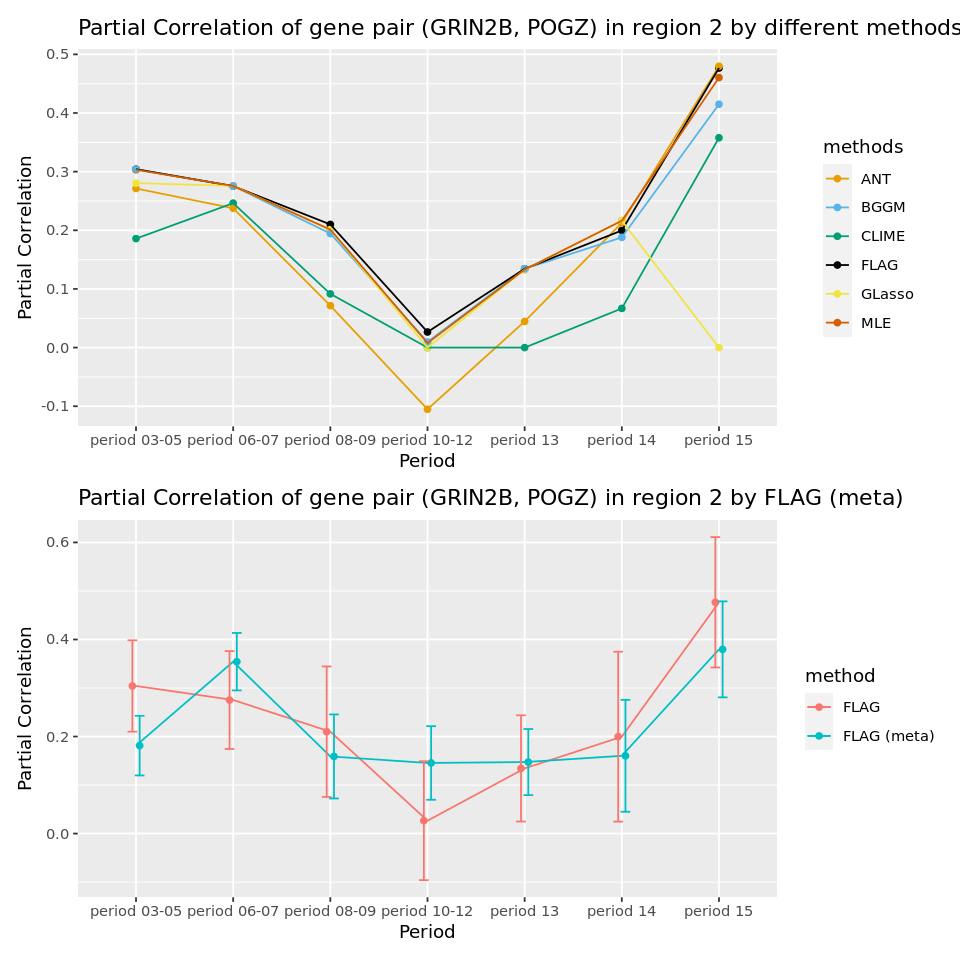

In [297]:
options(repr.plot.width=8, repr.plot.height=8)
len = length(r2.part)
df=data.frame(period=rep(c('period 03-05', 'period 06-07', 'period 08-09', 'period 10-12', 'period 13', 'period 14', 'period 15'), 6), 
      partialCorr=c(om.list, mle.list, clime.list, fastggm.list, glasso.list, bggm.list),
      methods=c(rep('FLAG', len), rep('MLE', len), rep('CLIME', len), rep('ANT', len), rep('GLasso', len), rep('BGGM', len)))
# options(repr.plot.width=8, repr.plot.height=4) 
df1=data.frame(period=rep(c('period 03-05', 'period 06-07', 'period 08-09', 'period 10-12', 'period 13', 'period 14', 'period 15'), 2), 
              partialCorrelation=c(r2.part, r2.meta.pc),
              partialCorrSe=c(r2.part.se, r2.meta.pc.se),
              method=c(rep('FLAG', 7), rep('FLAG (meta)', 7)))
ggplot(data=df, mapping=aes(x=period, y=partialCorr, color=methods))+ geom_point() + geom_line(aes(group=methods)) +
ggtitle('Partial Correlation of gene pair (GRIN2B, POGZ) in region 2 by different methods') +
ylab('Partial Correlation') + xlab('Period') +
scale_colour_manual(values = c("#E69F00", "#56B4E9", "#009E73", "#000000", "#F0E442", "#D55E00",  "#CC79A7")) +

ggplot(data=df1, mapping=aes(x=period, y=partialCorrelation, color=method))+ ylab('Partial Correlation') + xlab('Period') +
  geom_point(position=position_dodge(.15)) + geom_line(aes(group=method)) +
ggtitle('Partial Correlation of gene pair (GRIN2B, POGZ) in region 2 by FLAG (meta)') +
  geom_errorbar(aes(ymin=partialCorrelation-partialCorrSe, ymax=partialCorrelation+partialCorrSe), width=.2, position=position_dodge(.15))+
plot_layout(ncol = 1)